In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)


In [106]:
df = pd.read_csv('last_month.csv.gz')
df = df.sample(n=60000)
print(df.shape)

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(60000, 48)


In [107]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
279544,2016-05-28,201214,N,ES,V,47,2000-10-30,0,175,1,...,0,0,0,0,0,0,0,0,0,0
606851,2016-05-28,1495613,N,ES,V,23,2015-10-31,0,7,1,...,0,0,0,0,0,0,0,0,0,0
55994,2016-05-28,697617,N,ES,H,44,2007-06-16,0,107,1,...,0,0,0,0,0,0,0,0,0,0
622667,2016-05-28,1546297,N,ES,H,40,2016-04-19,1,1,1,...,0,0,0,0,0,0,0,0,0,0
783744,2016-05-28,976480,N,ES,H,25,2011-11-10,0,54,1,...,0,0,0,0,0,0,0,0,0,0


Maybe all you need is data from 05-28-2016..
You can use characterstics of the customer and their current products to predict other products.
Maybe that's the first step. The base step.
Then, maybe after that. You can look at the historical data to create new features.

- Maybe you look at what customers have done in the last year and a half, and create new features that way. Have they dropped certain products? Have they added certain products? You could create new columns for all those possibilities.
- Indrel (whether they are or are/not a primary customer) could also be good to look at and transform into a binary feature.
- Perhaps the data

In [108]:
df.describe()

,ncodpers,age,ind_nuevo,antiguedad,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,59735.000000,60000.000000,4.525500e+04,60000.0000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,8.793737e+05,40.099450,0.036350,79.973217,1.160067,1.0,26.502352,0.426800,1.336451e+05,0.0001,...,0.005267,0.008383,0.002033,0.048550,0.038167,0.022433,0.002983,0.052267,0.057283,0.121167
std,4.485620e+05,17.095228,0.187161,67.409991,3.957420,0.0,12.863843,0.494617,2.304703e+05,0.0100,...,0.072381,0.091177,0.045047,0.214927,0.191600,0.148089,0.054539,0.222566,0.232385,0.326324
min,1.589400e+04,2.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,6.611580e+03,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.818538e+05,25.000000,0.000000,22.000000,1.000000,1.0,15.000000,0.000000,6.858707e+04,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.675725e+05,38.000000,0.000000,54.000000,1.000000,1.0,28.000000,0.000000,1.012854e+05,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.263063e+06,50.000000,0.000000,135.000000,1.000000,1.0,35.000000,1.000000,1.555073e+05,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.553689e+06,115.000000,1.000000,256.000000,99.000000,1.0,52.000000,1.000000,2.554725e+07,1.0000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [300]:
def calcRates(group):
    rates = group[product_cols].sum()/group.shape[0]
    return rates

def meltRates(rates, id_var):
    return pd.melt(rates, id_vars=[id_var], value_name='rate', var_name='product')

def plotRates(ratesDf, col):
    for prod in ratesDf['product'].unique():
        product = ratesDf[ratesDf['product'] == prod]
        product.plot.bar(x=col, y='rate')
        plt.title(prod)
        plt.xticks(rotation=0)
        plt.show()
        
def uniqueAndCounts(col):
    print(df[col].unique())
    sns.countplot(df[col])

In [109]:
product_cols = df.columns.values[24:]
df['num_products'] = df.apply(lambda x: np.sum(x[24:-1]), axis=1)

In [110]:
print('Minimum number of products customer has: {}'.format(df.num_products.min()))
print('Minimum number of products customer has: {}'.format(df.num_products.max()))

Minimum number of products customer has: 0
Minimum number of products customer has: 11


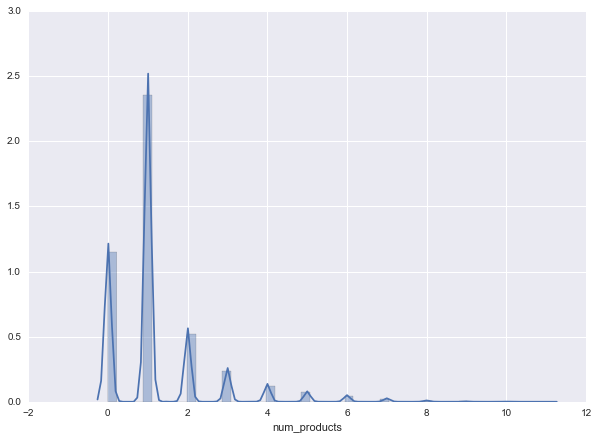

In [111]:
sns.distplot(df.num_products)

In [112]:
df.isnull().sum()

fecha_dato                   0
ncodpers                     0
ind_empleado                 0
pais_residencia              0
sexo                         0
age                          0
fecha_alta                   0
ind_nuevo                    0
antiguedad                   0
indrel                       0
ult_fec_cli_1t           59902
indrel_1mes                238
tiprel_1mes                238
indresi                      0
indext                       0
conyuemp                 59991
canal_entrada              403
indfall                      0
tipodom                      0
cod_prov                   265
nomprov                    265
ind_actividad_cliente        0
renta                    14745
segmento                   426
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp

### ult_fec_cli_1t and conyuemp

ult_fec_cli_1t and conyuemp are extremely sparse. The ult column contains the last date the customer was a primary customer. I'm not sure what that means. Perhaps that column should be changed to a 0/1, indicating whether the customer if the customer ever changed from primary to not primary.

conyuemp is more straightforward. It indicates whether a customer is a spouse of an employee, so I'll likely code it at as 0/1.

### pais_residencia

The overwhelming majority are Spanish, so filling nulls with 'ES' could be reasonable. 

In [113]:
print('Number of countries: {}'.format(len(df.pais_residencia.unique())))
df.pais_residencia.value_counts().head(10)

Number of countries: 49


ES    59733
GB       21
DE       21
US       19
FR       19
CO       16
AR       16
CH       15
RO       12
IT       11
Name: pais_residencia, dtype: int64

Plot the rate at which customer have products for the top six countries. 

ind_cco_fin_ult1 is the most prevalent by far. As it isn't an individual product but rather and indicator for 'Current Accounts', that seems reasonable.

For all the countries, the second most popular product is 'Particular Account'. I'm not sure what that means...perhaps 'Individual Account'?

After those top two, there is some variation in the distributions, so country of residence could provide some predictive power. Maybe some products aren't even offered in some countries? 

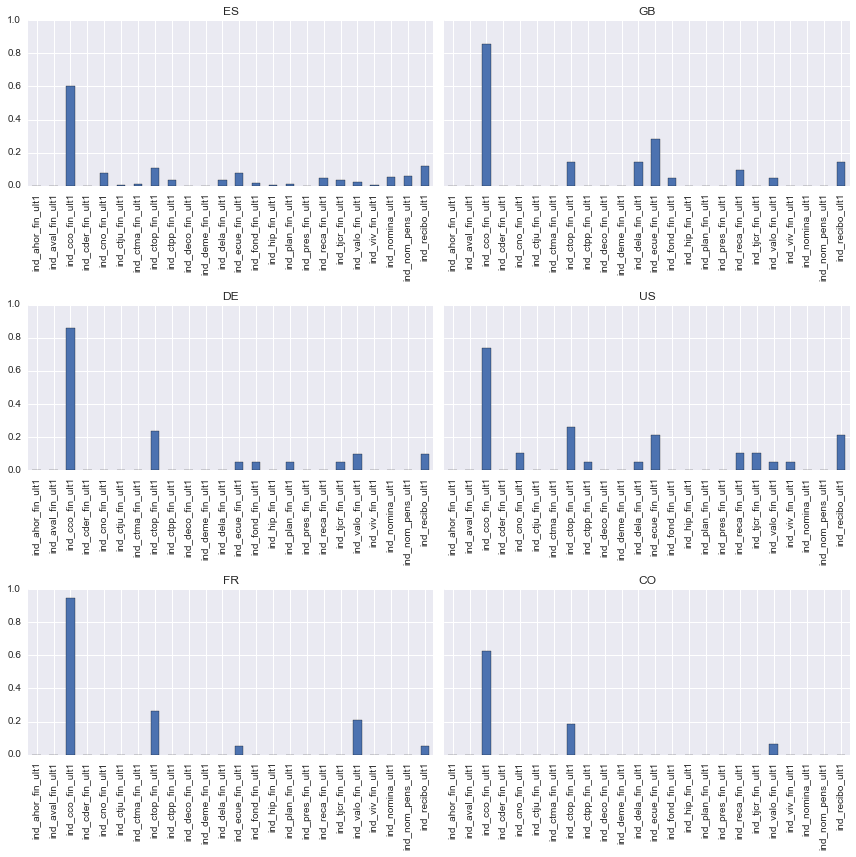

In [114]:
topSix = df.pais_residencia.value_counts().head(6).index

fig, axList = plt.subplots(3,2, figsize=(12, 12), sharey=True)
for country, ax in zip(topSix.values, axList.ravel()):
    (df[df.pais_residencia == country][product_cols].sum()/df[df.pais_residencia == country].shape[0]).plot(kind='bar', ax = ax)
    ax.set_title(country)
fig.tight_layout()
plt.show()


### Sexo

I think 'H' is female, meaning there are more male. Is it chance variation in the sample, or are there more male customers generally?

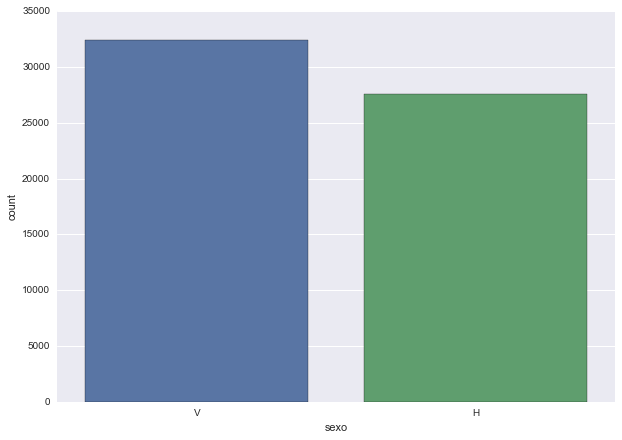

In [115]:
sns.countplot(df.sexo)

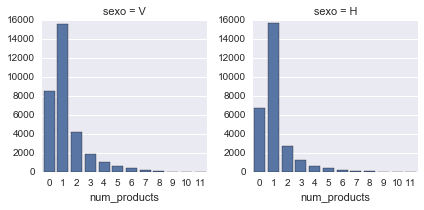

In [116]:
g = sns.FacetGrid(data=df, col='sexo', sharey=False)
g.map(sns.countplot, 'num_products')

In [117]:

bySex = df.groupby('sexo')
ratesBySex = bySex.apply(calcRates).reset_index()
ratesBySex = pd.melt(ratesBySex, id_vars=['sexo'], value_name='rate', var_name='product')
ratesBySex

,sexo,product,rate
0,H,ind_ahor_fin_ult1,0.000109
1,V,ind_ahor_fin_ult1,0.000092
2,H,ind_aval_fin_ult1,0.000000
3,V,ind_aval_fin_ult1,0.000000
4,H,ind_cco_fin_ult1,0.625957
5,V,ind_cco_fin_ult1,0.585909
6,H,ind_cder_fin_ult1,0.000109
7,V,ind_cder_fin_ult1,0.000493
8,H,ind_cno_fin_ult1,0.073204
9,V,ind_cno_fin_ult1,0.084784


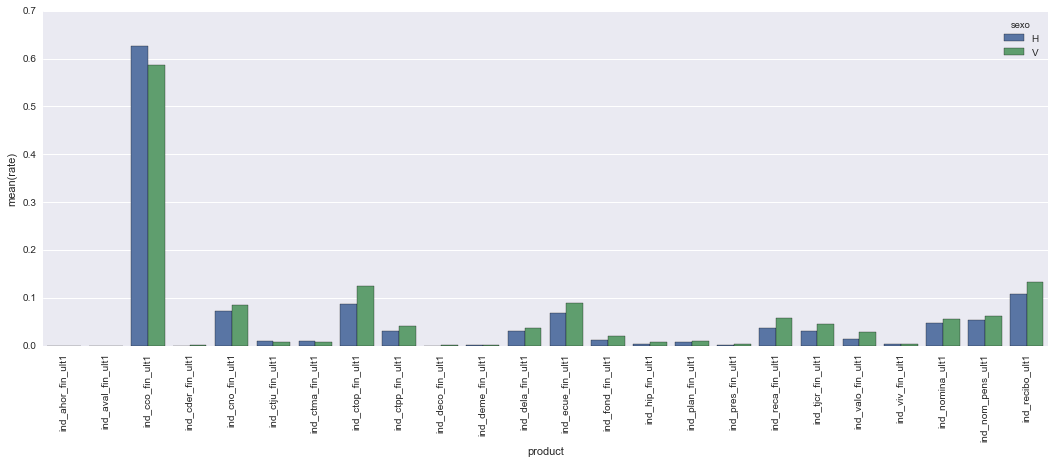

In [118]:
plt.figure(figsize=(18, 6))
sns.barplot(data=ratesBySex, x= 'product', y='rate', hue='sexo')
_ = plt.xticks(rotation=90)

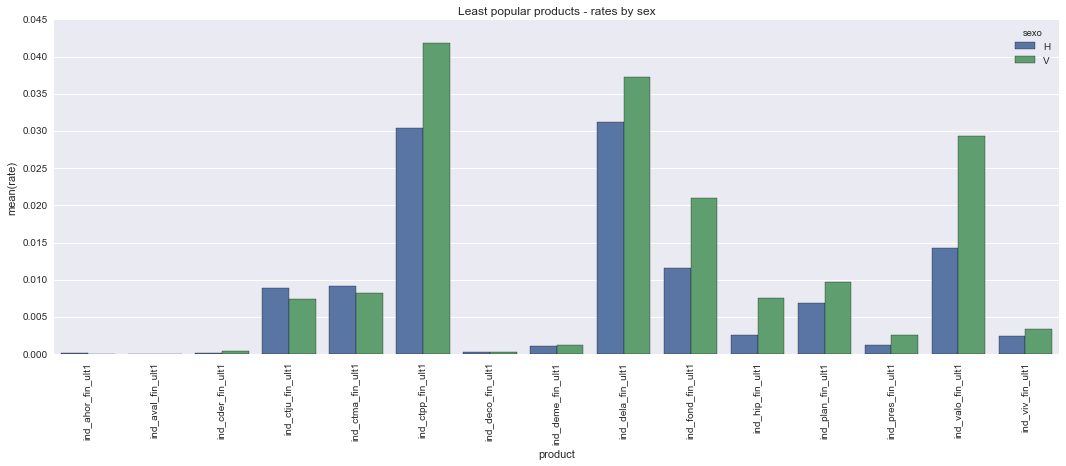

In [119]:
plt.figure(figsize=(18, 6))
leastPopularProducts = ratesBySex.groupby('product').rate.mean().sort_values().head(15).index.values
leastPopularMask = [product in list(leastPopularProducts) for product in ratesBySex['product'].values]
sns.barplot(data=ratesBySex.loc[leastPopularMask,:], x= 'product', y='rate', hue='sexo')
plt.xticks(rotation=90)
plt.title("Least popular products - rates by sex")

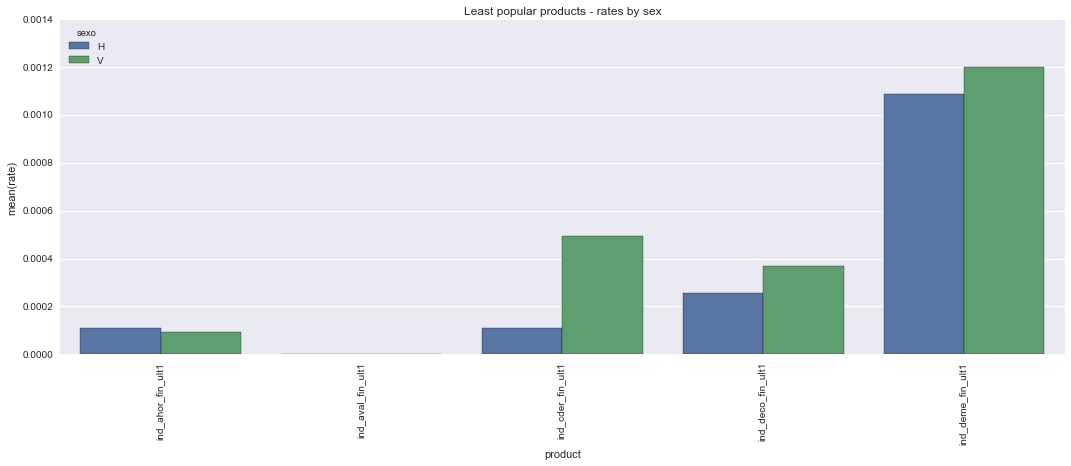

In [120]:
plt.figure(figsize=(18, 6))
leastPopularProducts = ratesBySex.groupby('product').rate.mean().sort_values().head(5).index.values
leastPopularMask = [product in list(leastPopularProducts) for product in ratesBySex['product'].values]
sns.barplot(data=ratesBySex.loc[leastPopularMask,:], x= 'product', y='rate', hue='sexo')
plt.xticks(rotation=90)
plt.title("Least popular products - rates by sex")

### Age

Lots of customers in their early 20's. The dropoff and ensuing rise around age 30 is interesting.

Mean Age: 40.099450


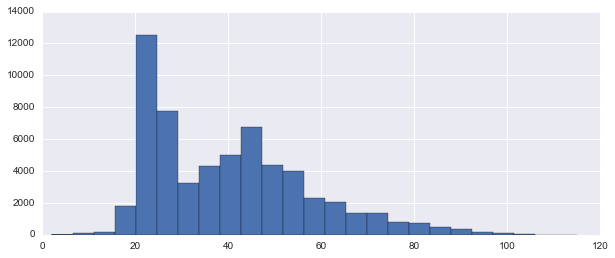

In [121]:
print('Mean Age: {:2f}'.format(df.age.mean()))
df.age.hist(bins=25, figsize=(10, 4))

In [122]:
df['fiveYearBin'] = np.floor(df.age / 5)

In [127]:
byFiveYear = df.groupby(['fiveYearBin'])
ratesFiveYear = byFiveYear.apply(calcRates).reset_index()
ratesFiveYear = meltRates(ratesFiveYear, 'fiveYearBin')
ratesFiveYear.head()

,fiveYearBin,product,rate
0,0.0,ind_ahor_fin_ult1,0.0
1,1.0,ind_ahor_fin_ult1,0.0
2,2.0,ind_ahor_fin_ult1,0.0
3,3.0,ind_ahor_fin_ult1,0.0
4,4.0,ind_ahor_fin_ult1,0.0


- Savings and 'guarantees' accounts very concentrated in certain age groups
- Current Accounts: downward sloping trend. As people terminate their accounts over time?
- Junior Account: as expected, is very young
- Particular Account: Likelihood seems to increase with age.
- Particular Plus: Likelihood seems to decrease with age.
- Long term deposit: likelihood seems to increase with age -- because it is a safe investment?
- e accounts: peak and then slide off, perhaps as older people are less technically savvy?
- mortgage: peaks in 40-60 range. Wonder if they could do better with the 35-50 year age range? Those seem like decent prospective home buyers..?
- Credit Card: wonder if they could do better in the 25-35 age range?

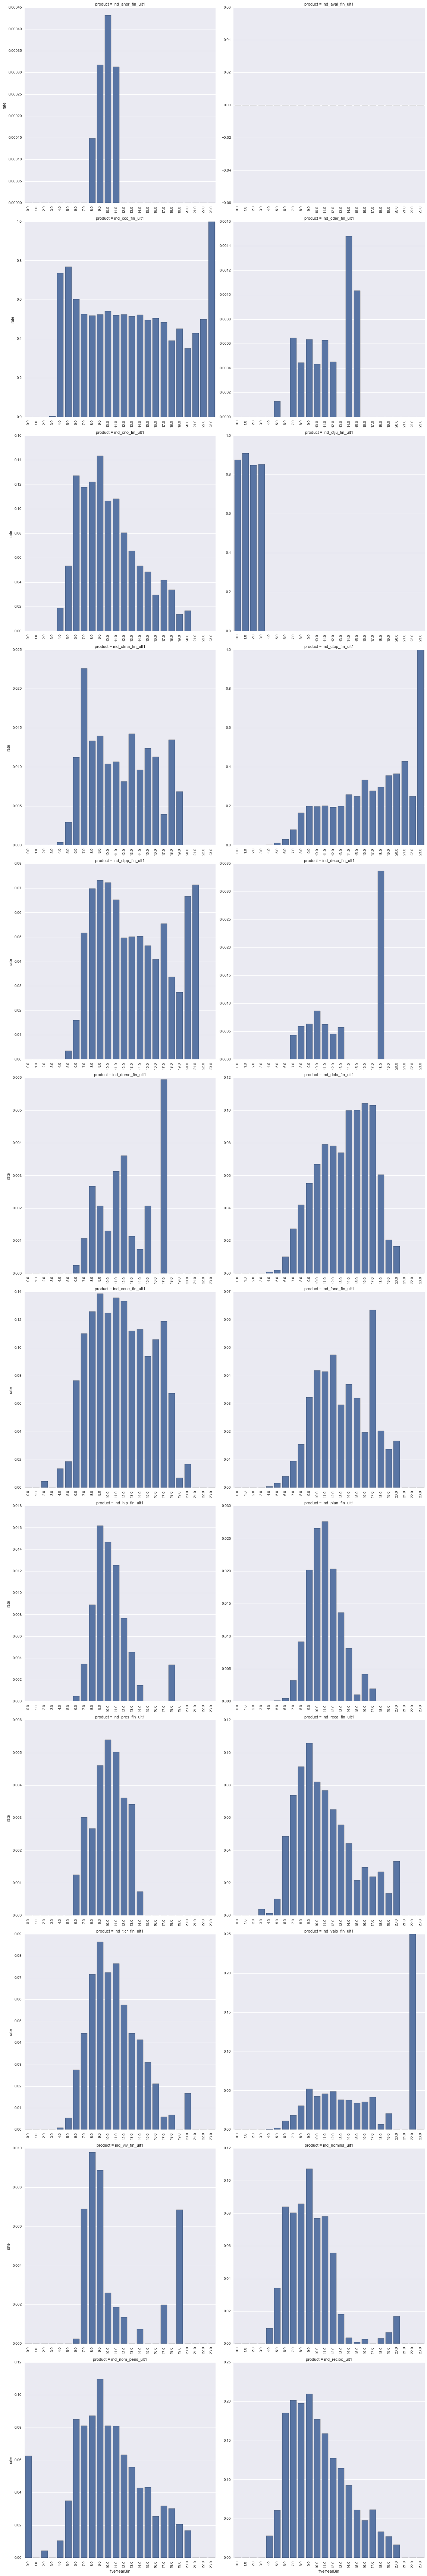

In [128]:
g = sns.FacetGrid(ratesFiveYear, col='product', col_wrap=2, size=8, sharey=False, sharex=False)
g.map(sns.barplot, 'fiveYearBin', 'rate')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

### Fecha Alta

Most of the customers in the sample signed up for an account within the last five years. Is that dip in 2009 the global economic recession?

In [129]:
df['fecha_alta'] = pd.to_datetime(df.fecha_alta)

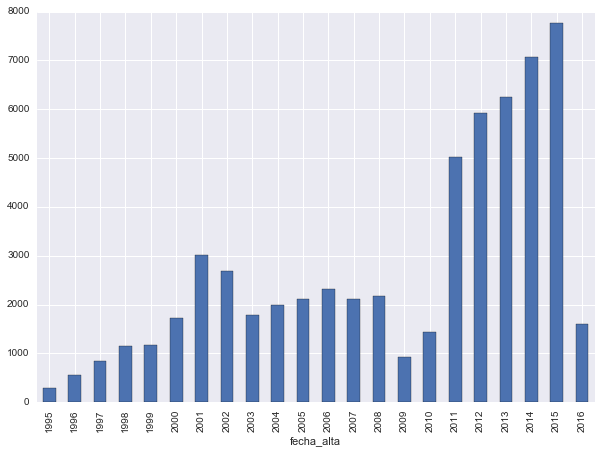

In [130]:
df.groupby([df.fecha_alta.dt.year]).fecha_alta.count().plot(kind='bar', figsize=(10, 7))

In [131]:
#df['acct_age_days'] = -1*(df.fecha_alta - pd.to_datetime('2016-05-28')).dt.days

In [132]:
#df.sort_values('acct_age_days')[['acct_age_days', 'fecha_alta']].head()

,acct_age_days,fecha_alta
620996,-3,2016-05-31
621025,-3,2016-05-31
620850,-3,2016-05-31
620958,-3,2016-05-31
620856,-3,2016-05-31


In [ ]:
#df['acct_age_days'].hist()

In [ ]:
#df['acct_age_years'] = df.acct_age_days/365

In [ ]:
#df['years_floor'] = np.floor(df.acctAge_years) + 1

In [ ]:
#df[df.years_floor == 10].ind_cco_fin_ult1.value_counts()

In [ ]:
#ratesByYear = groupedByYear.apply(calcRates)
#ratesByYear.head()


- Savings Account: more likely for older accounts
- Guarantess Account: entirely concentrated in 19 year old accounts
- Derivada Account: more likely for older accounts
- Payroll Account: more likely for older accounts
- Mas Particular: very concentrated in 6 year old accounts
- Particular and Particular Plus: more likely for older. Almost none for newer accounts
- Mortgage account: towards older accounts
- Overall many products get more likely as the age of the accounts increase. This may make intuitive sense -- the longer a person is a customer of a bank, the more products they're likely to try. On the other hand, the likelihood of some products is entirely concentrated in the accounts or a certain age. Maybe these were short-run products offered only to new customers, which were quickly retired? I'm not sure.

In [ ]:
#for col in ratesByYear.drop('years_floor', axis=1).columns:
 #   ratesByYear.plot.bar( 'years_floor', col)
#  plt.show()

In [ ]:
#ratesByYear[ratesByYear.years_floor == 10.0]

In [ ]:
#ratesByYear

In [ ]:
#ratesByYear.shape[0] - ratesByYear.astype(bool).sum()

## ind_nuevo

In [133]:
df.ind_nuevo.sum() / df.shape[0]

0.03635

In [137]:
byIndNuevo = df.groupby('ind_nuevo')
nuevoRates = byIndNuevo.apply(calcRates).reset_index()
nuevoRates = meltRates(nuevoRates, 'ind_nuevo')
nuevoRates.head()

,ind_nuevo,product,rate
0,0,ind_ahor_fin_ult1,0.000104
1,1,ind_ahor_fin_ult1,0.000000
2,0,ind_aval_fin_ult1,0.000000
3,1,ind_aval_fin_ult1,0.000000
4,0,ind_cco_fin_ult1,0.607309


In [142]:
newCust

,ind_nuevo,product,rate
1,1,ind_ahor_fin_ult1,0.000000
3,1,ind_aval_fin_ult1,0.000000
5,1,ind_cco_fin_ult1,0.524530
7,1,ind_cder_fin_ult1,0.000000
9,1,ind_cno_fin_ult1,0.060064
11,1,ind_ctju_fin_ult1,0.011921
13,1,ind_ctma_fin_ult1,0.060523
15,1,ind_ctop_fin_ult1,0.000000
17,1,ind_ctpp_fin_ult1,0.000000
19,1,ind_deco_fin_ult1,0.000000


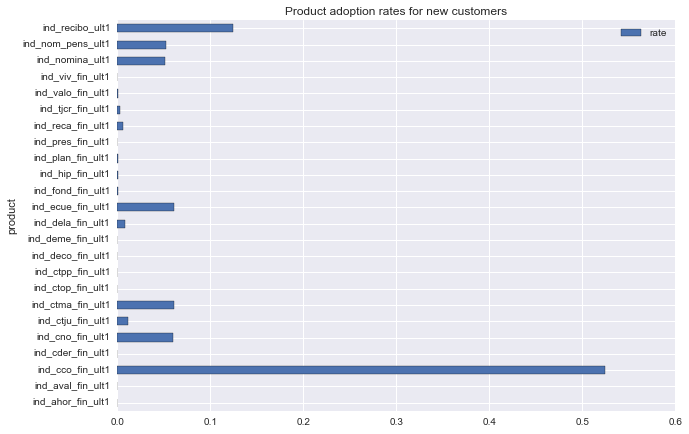

In [146]:
newCust = nuevoRates[nuevoRates.ind_nuevo == 1]
newCust.plot.barh(x='product', y='rate')
plt.title('Product adoption rates for new customers')

### antiguedad

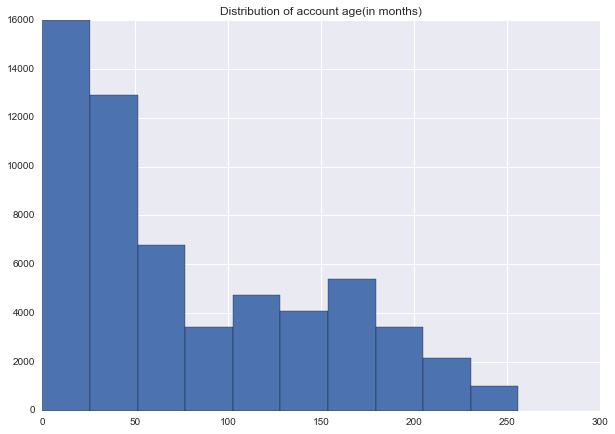

In [148]:
df.antiguedad.hist()
plt.title('Distribution of account age(in months)')

## Indrel(churn indicator?)

In [153]:
df[df.indrel == 99].shape[0] /df.shape[0]

0.0016333333333333334

## indrel_1mes (customer type)

In [248]:
df.loc[df.indrel_1mes == 1.0,'indrel_1mes'] = 'Primary'
df.loc[df.indrel_1mes == 1,'indrel_1mes'] = 'Primary'
df.loc[df.indrel_1mes== 2,'indrel_1mes'] = 'Co-owner'
df.loc[df.indrel_1mes == 2.0,'indrel_1mes'] = 'Co-owner'
df.loc[df.indrel_1mes == 3,'indrel_1mes'] = 'Former Primary'
df.loc[df.indrel_1mes == 3.0,'indrel_1mes'] = 'Former Primary'
df.loc[df.indrel_1mes== 4,'indrel_1mes'] = 'Former Co-owner'
df.loc[df.indrel_1mes == 4.0,'indrel_1mes'] = 'Former Co-owner'
df.loc[df.indrel_1mes == 'P','indrel_1mes'] = 'Potential'

In [249]:
df.indrel_1mes.unique()

array(['Primary', nan, 'Co-owner', 'Potential', 'Former Primary',
       'Former Co-owner'], dtype=object)

In [250]:
byCustType = df.groupby('indrel_1mes')
ratesByCustType = byCustType.apply(calcRates).reset_index()
ratesByCustType = meltRates(ratesByCustType, 'indrel_1mes')

In [251]:
ratesByCustType

,indrel_1mes,product,rate
0,Co-owner,ind_ahor_fin_ult1,0.000000
1,Former Co-owner,ind_ahor_fin_ult1,0.000000
2,Former Primary,ind_ahor_fin_ult1,0.000000
3,Potential,ind_ahor_fin_ult1,0.000000
4,Primary,ind_ahor_fin_ult1,0.000100
5,Co-owner,ind_aval_fin_ult1,0.000000
6,Former Co-owner,ind_aval_fin_ult1,0.000000
7,Former Primary,ind_aval_fin_ult1,0.000000
8,Potential,ind_aval_fin_ult1,0.000000
9,Primary,ind_aval_fin_ult1,0.000000


In [221]:
ratesByCustType['indrel_1mes'] = ratesByCustType.indrel_1mes.astype(str)

In [222]:
ratesByCustType.loc[ratesByCustType.indrel_1mes == '1.0','indrel_1mes'] = 'Primary'
ratesByCustType.loc[ratesByCustType.indrel_1mes == '1','indrel_1mes'] = 'Primary'
ratesByCustType.loc[ratesByCustType.indrel_1mes == '2','indrel_1mes'] = 'Co-owner'
ratesByCustType.loc[ratesByCustType.indrel_1mes == '2.0','indrel_1mes'] = 'Co-owner'
ratesByCustType.loc[ratesByCustType.indrel_1mes == '3','indrel_1mes'] = 'Former Primary'
ratesByCustType.loc[ratesByCustType.indrel_1mes == '3.0','indrel_1mes'] = 'Former Primary'
ratesByCustType.loc[ratesByCustType.indrel_1mes == '4','indrel_1mes'] = 'Former Co-owner'
ratesByCustType.loc[ratesByCustType.indrel_1mes == '4.0','indrel_1mes'] = 'Former Co-owner'
ratesByCustType.loc[ratesByCustType.indrel_1mes == 'P','indrel_1mes'] = 'Potential'

- there are many products that only primary customers have
- I'm not sure what it means when a potential customer has a product

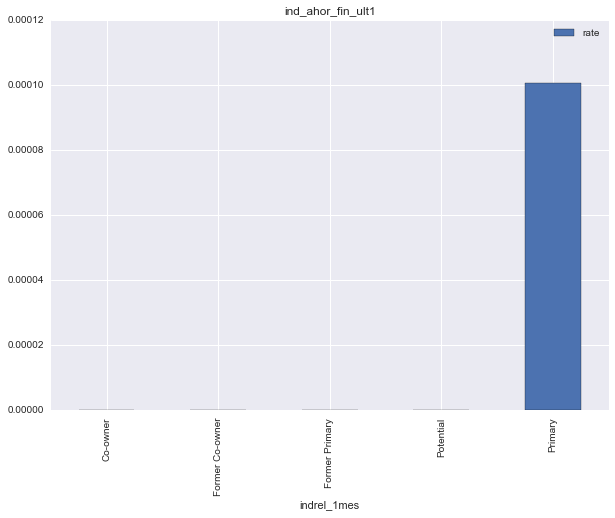

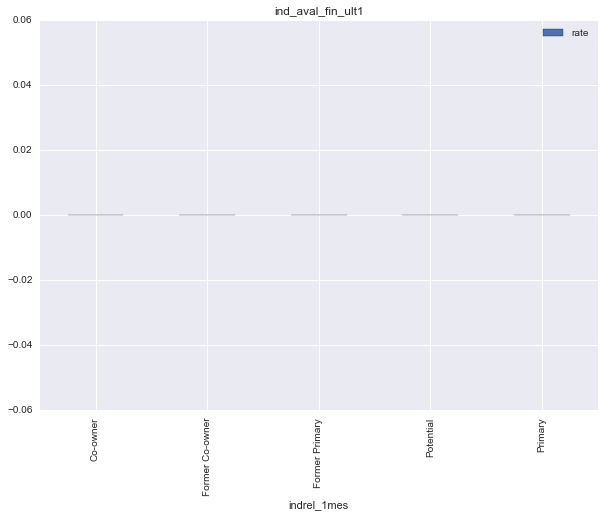

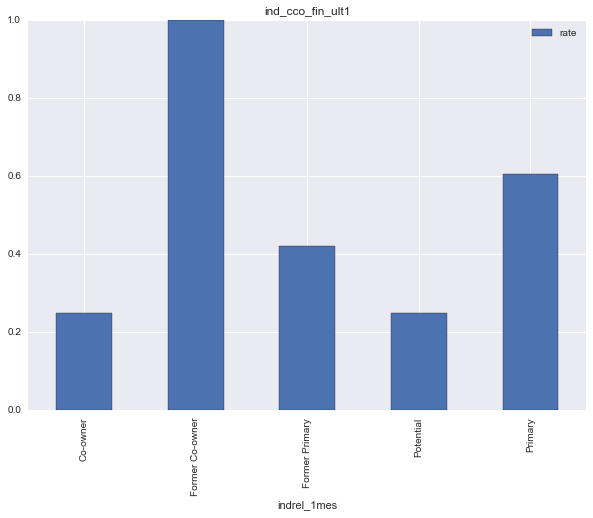

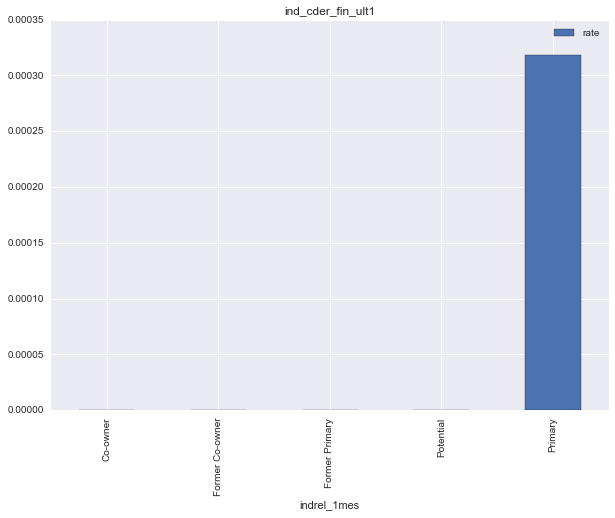

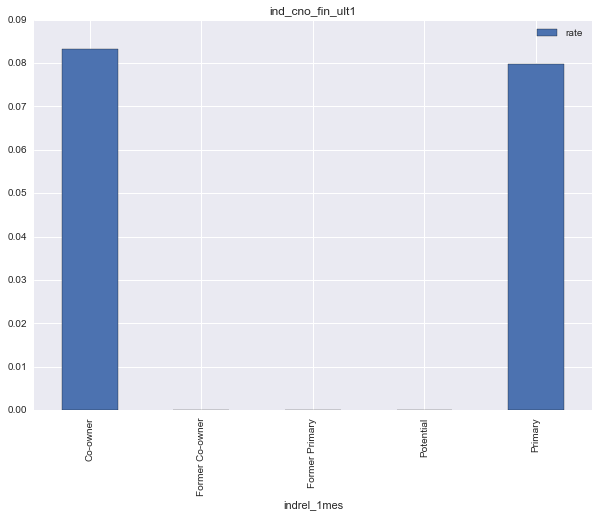

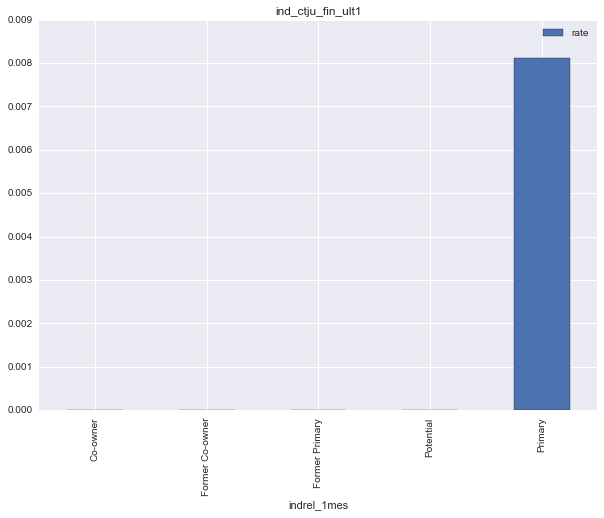

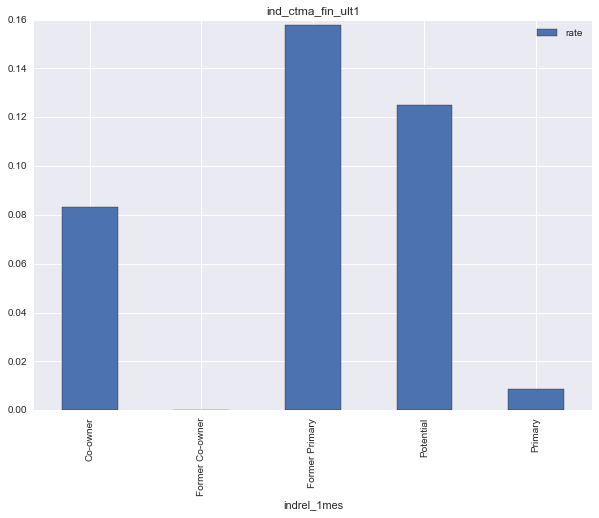

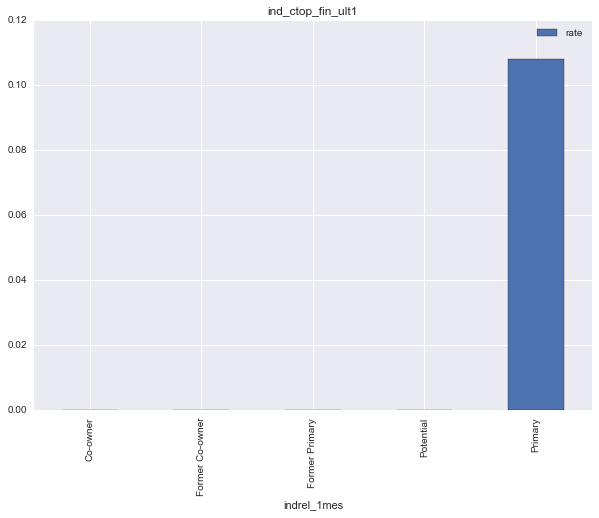

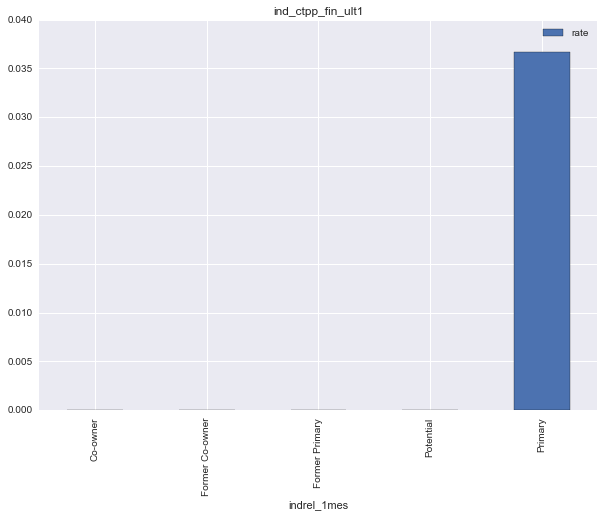

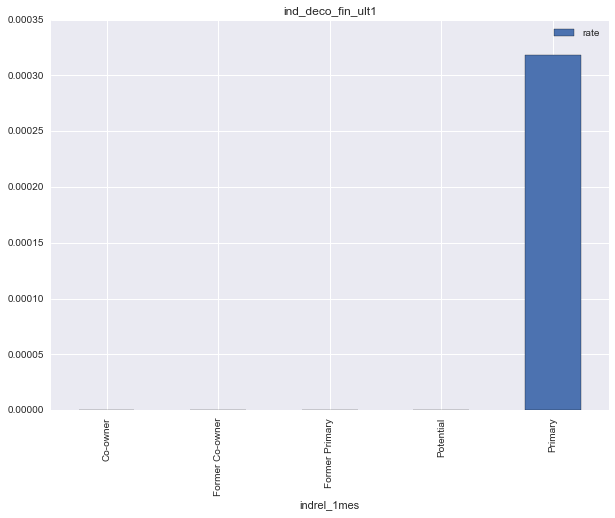

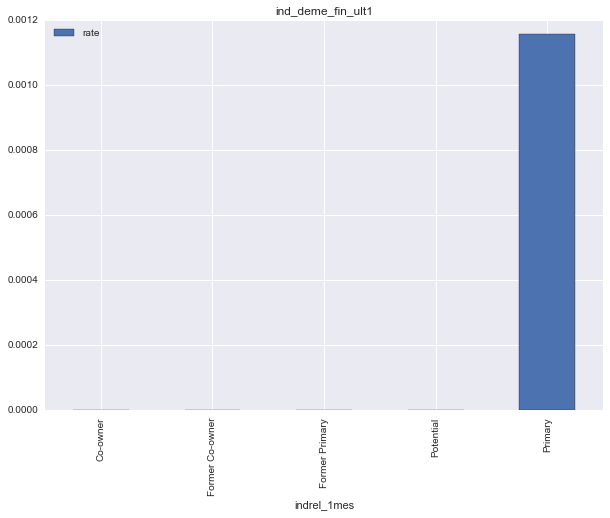

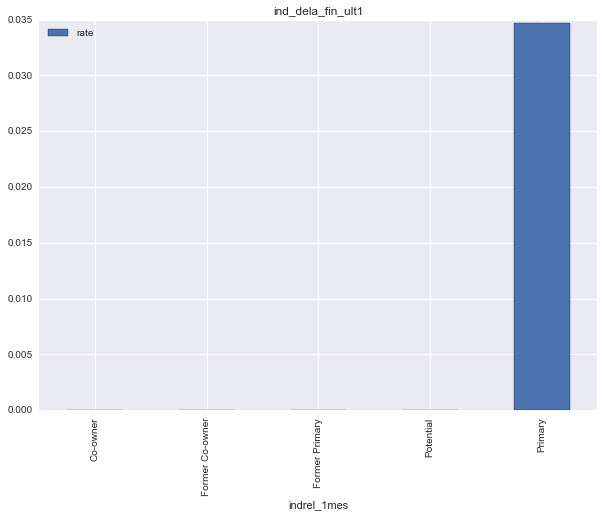

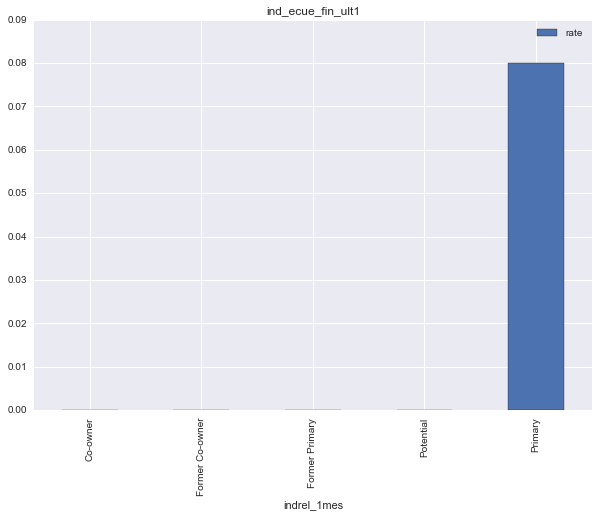

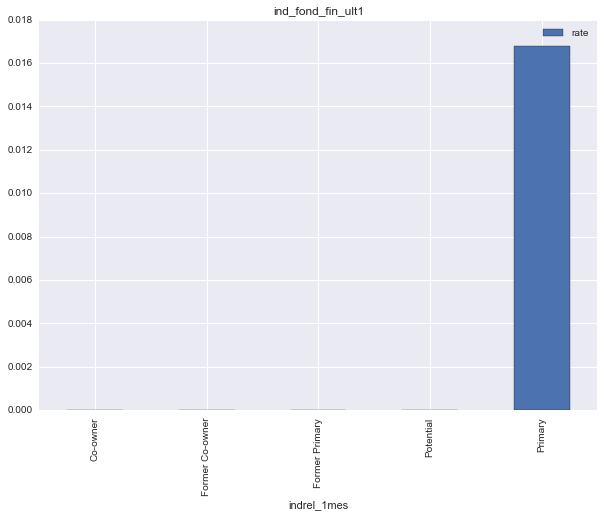

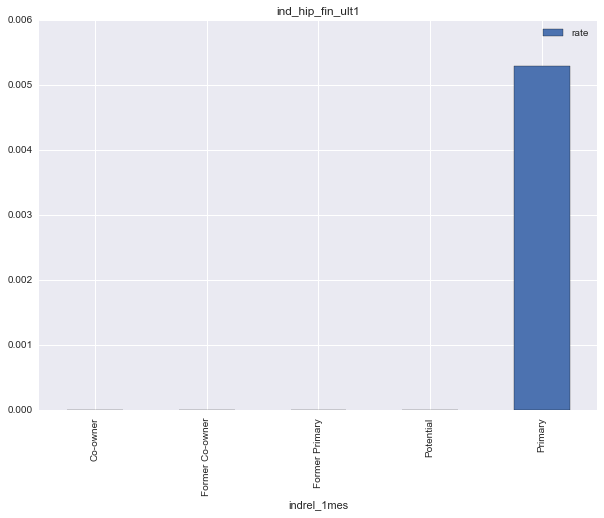

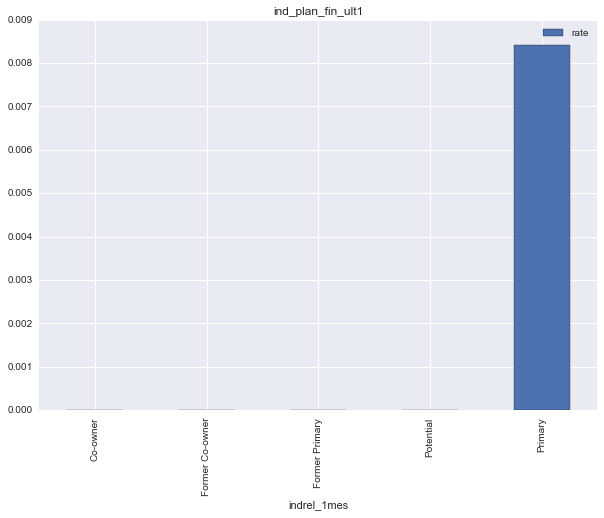

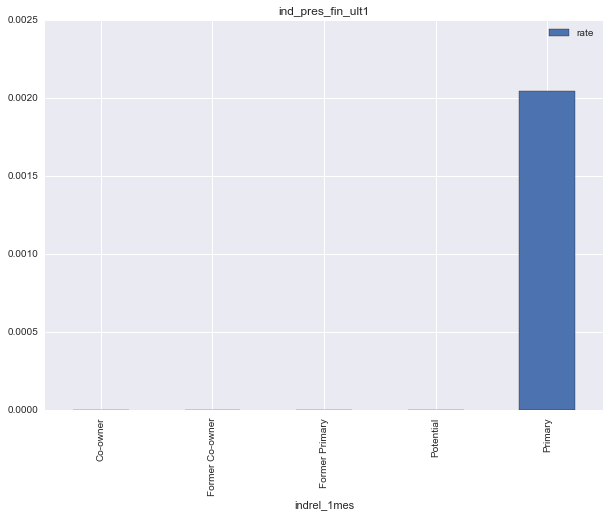

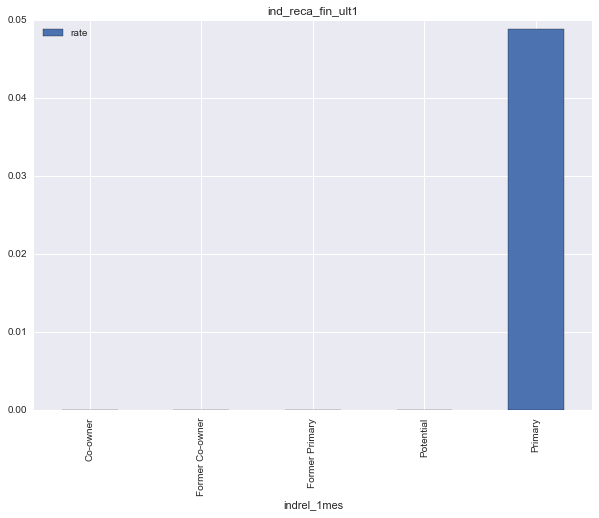

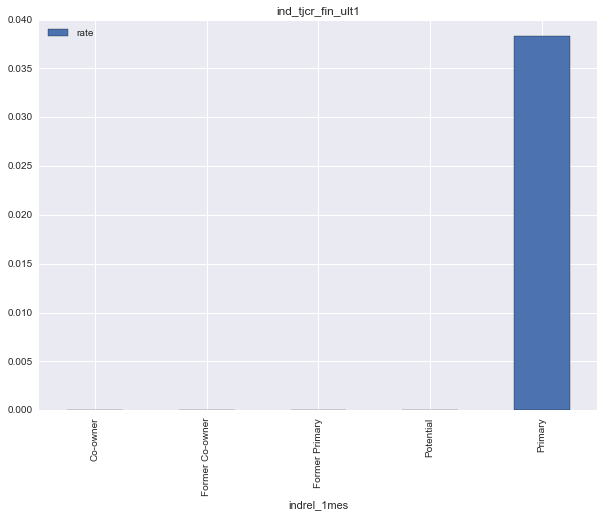

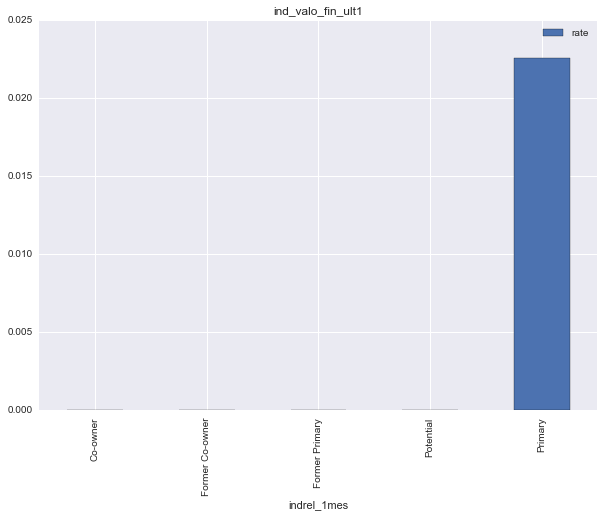

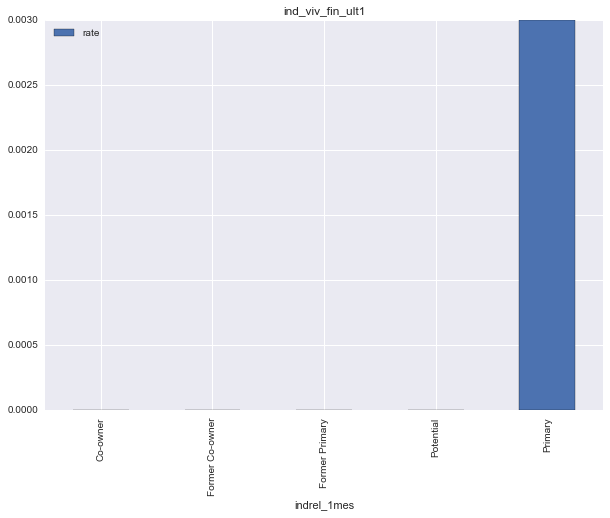

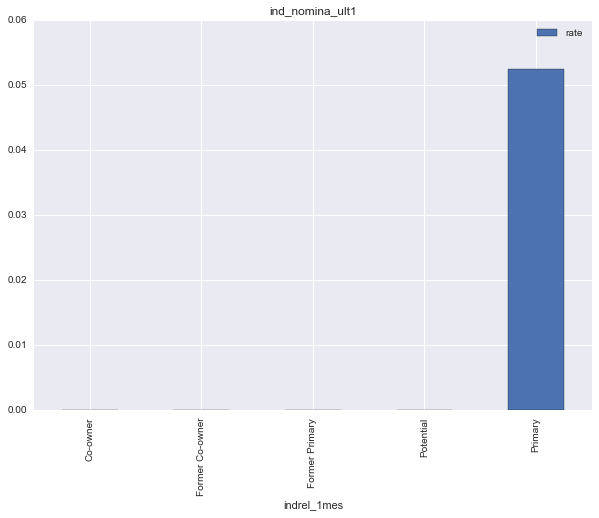

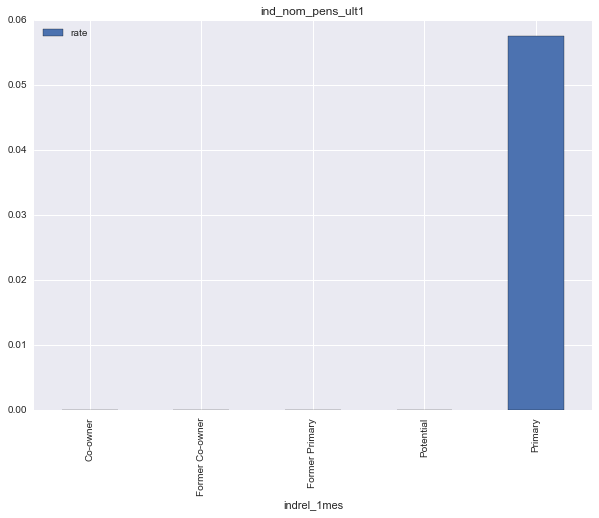

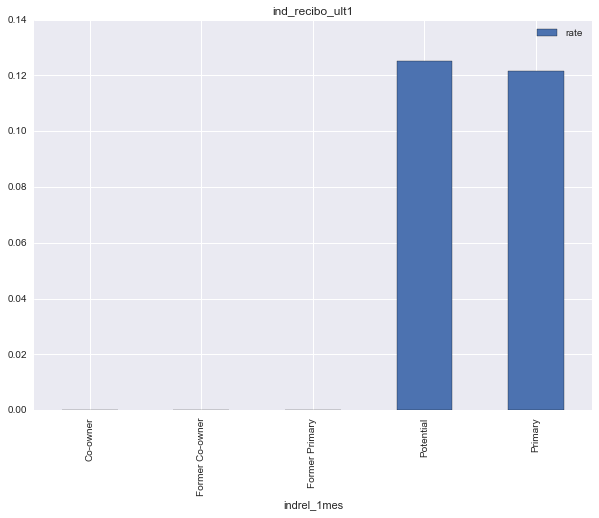

In [257]:
for prod in ratesByCustType['product'].unique():
    product = ratesByCustType[ratesByCustType['product'] == prod]
    product.plot.bar(x='indrel_1mes', y='rate')
    plt.title(prod)
    plt.show()

## tiprel_1mes

Need to fill Nans.

In [258]:
df.tiprel_1mes.unique()

array(['A', 'I', nan, 'R', 'P'], dtype=object)

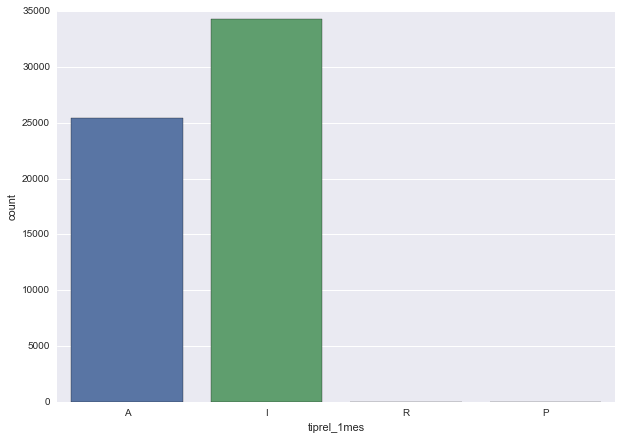

In [259]:
sns.countplot(df.tiprel_1mes)

In [262]:
ratesByCustRel = df.groupby('tiprel_1mes').apply(calcRates).reset_index()

In [293]:
df[df.tiprel_1mes == 'P'].ind_ctma_fin_ult1.shape

(20,)

In [264]:
ratesByCustRel = meltRates(ratesByCustRel, 'tiprel_1mes')

- Most products are most likely (or only) to be had by active customers 
- ind_ctma_fin_ult1 is interesting. More likely to be had by potentials or formers.

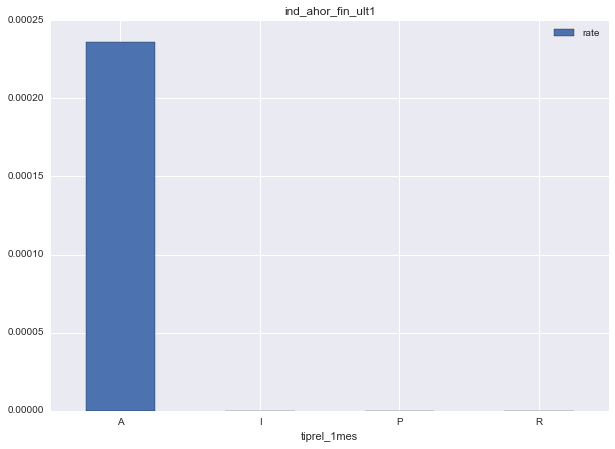

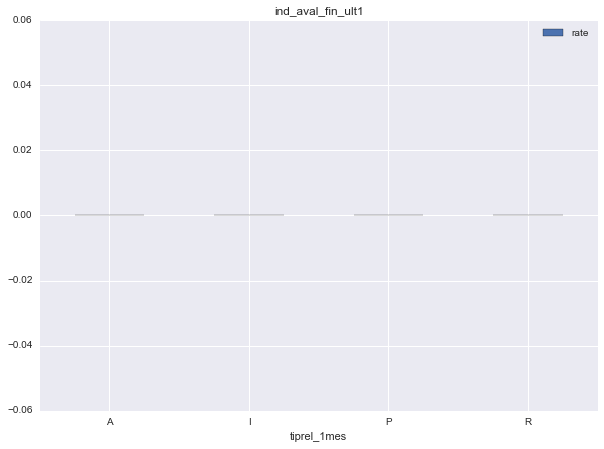

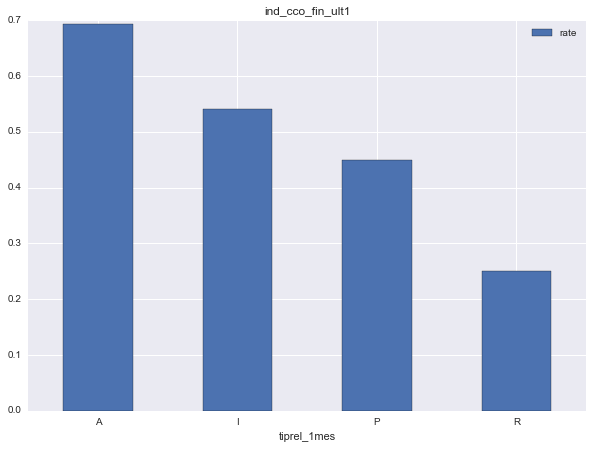

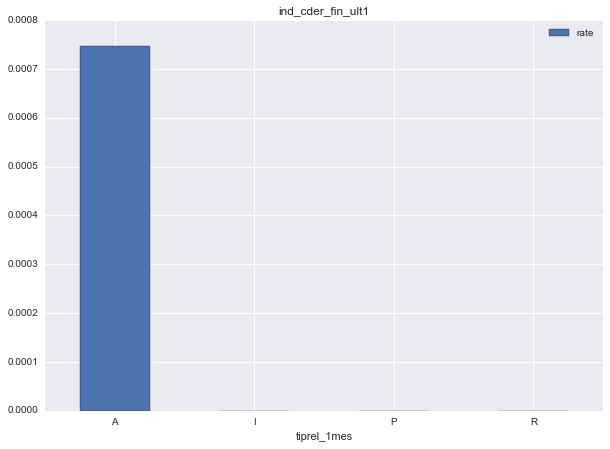

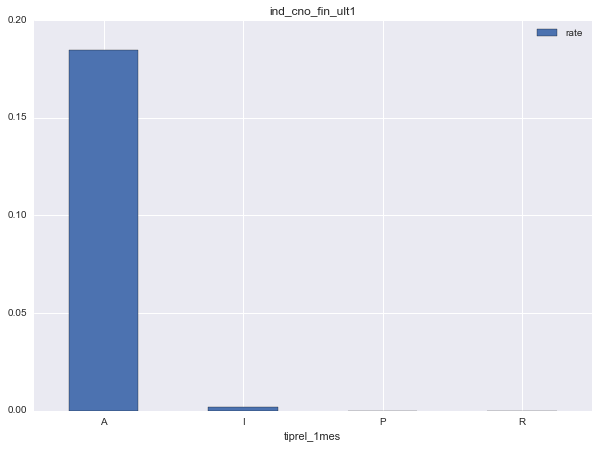

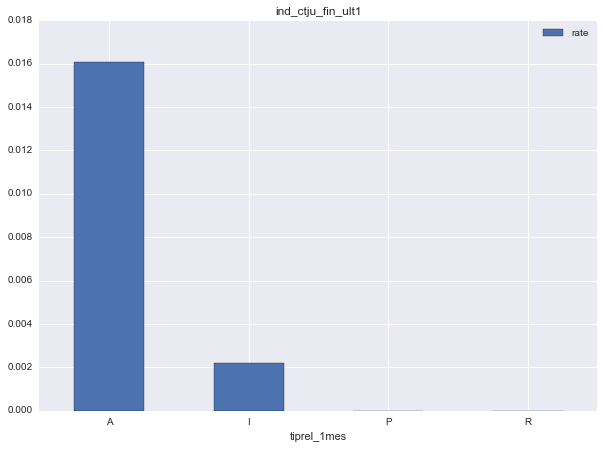

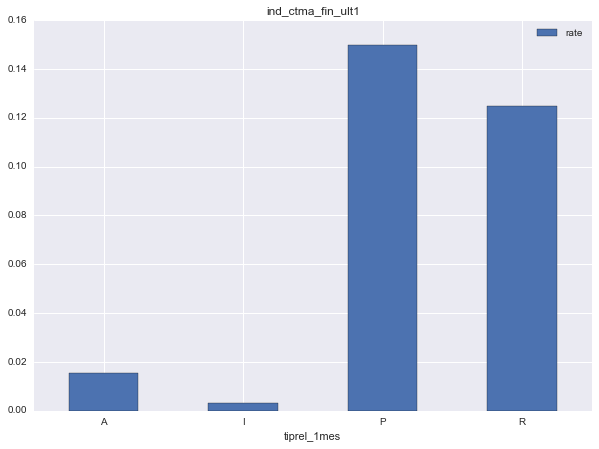

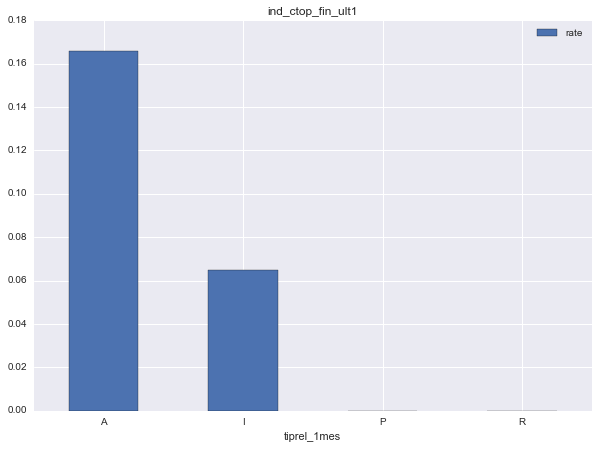

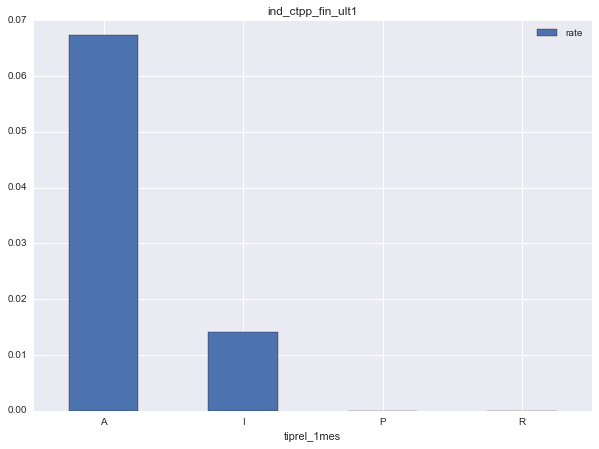

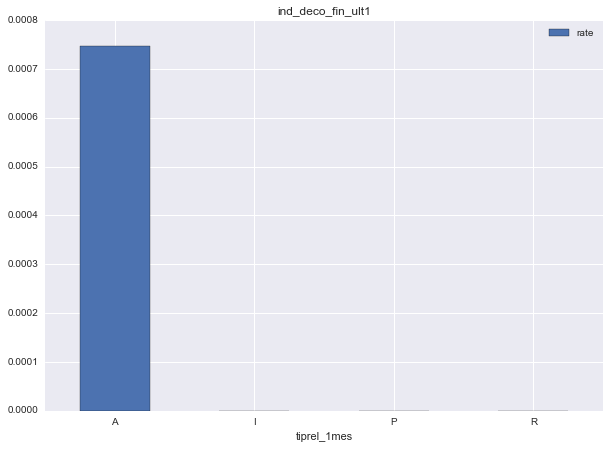

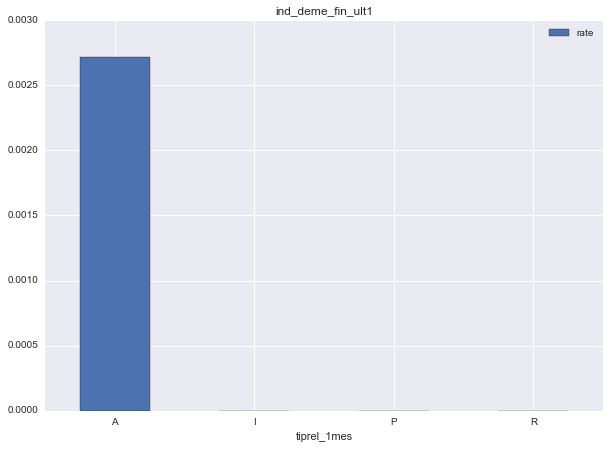

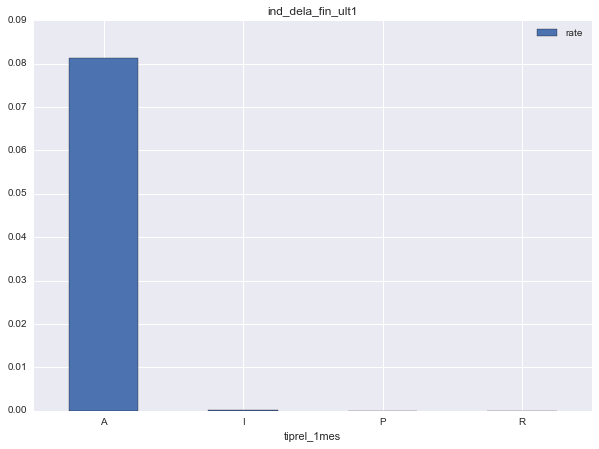

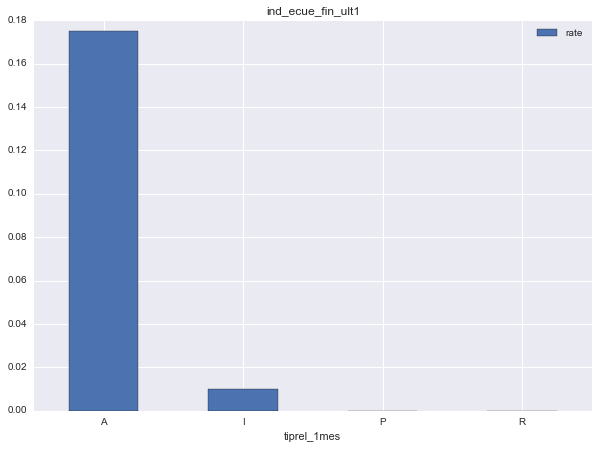

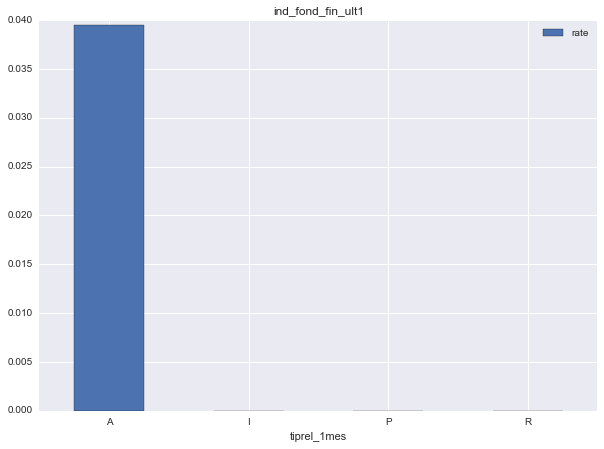

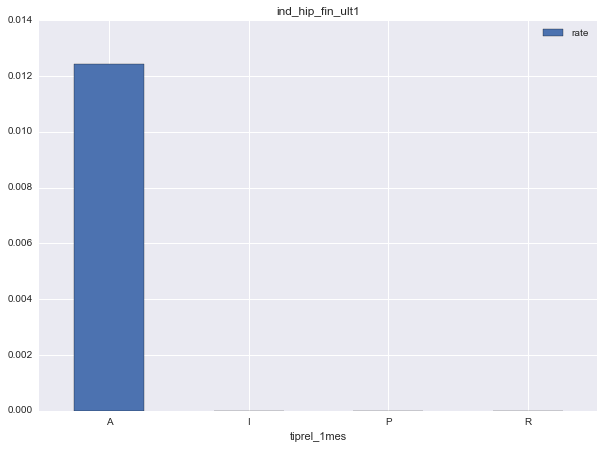

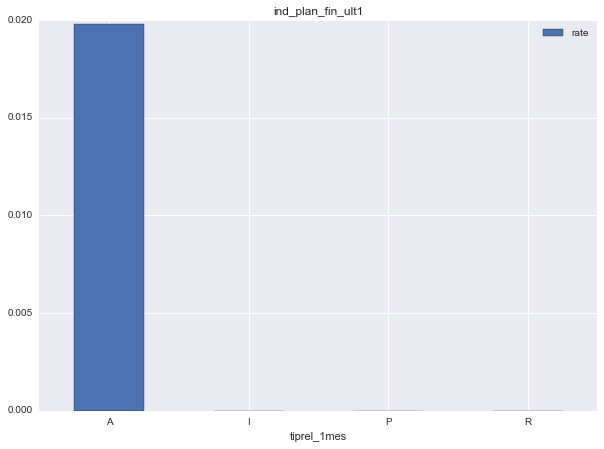

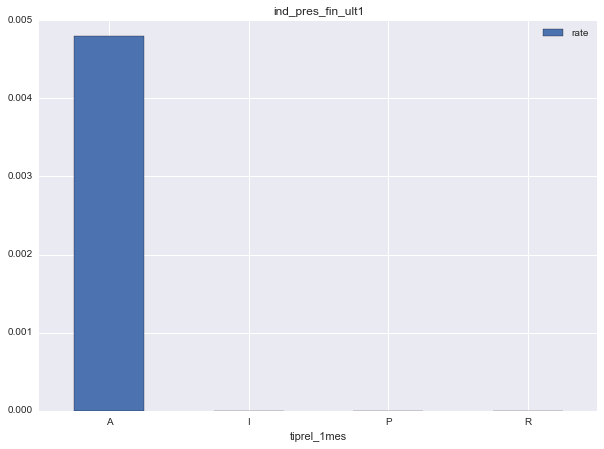

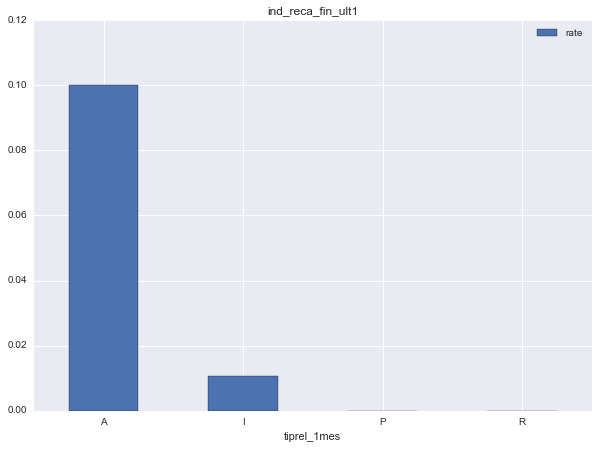

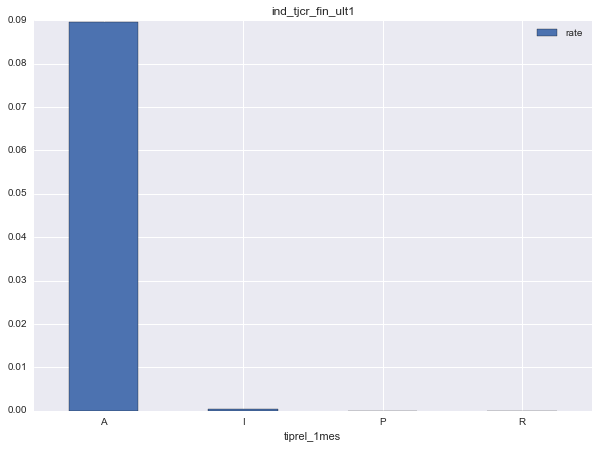

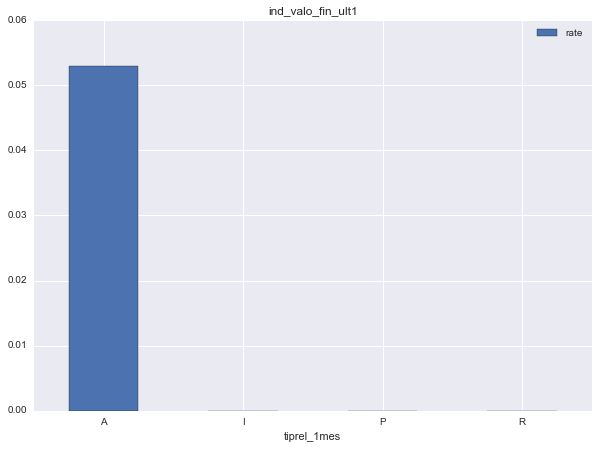

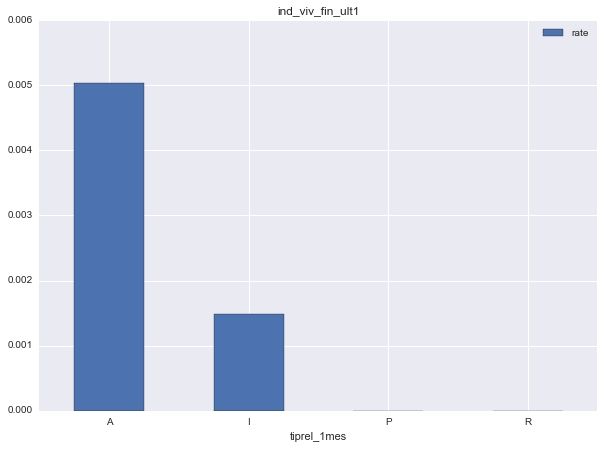

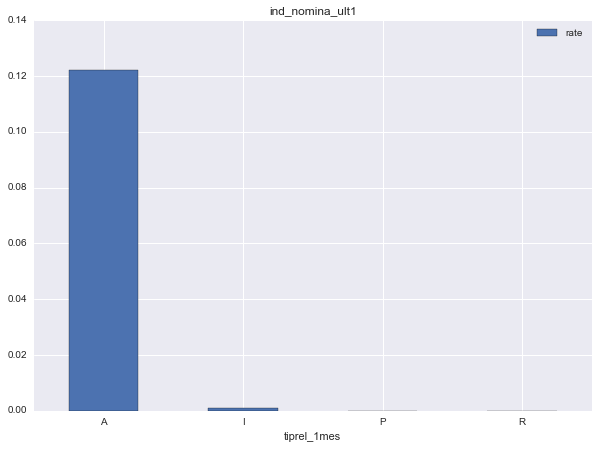

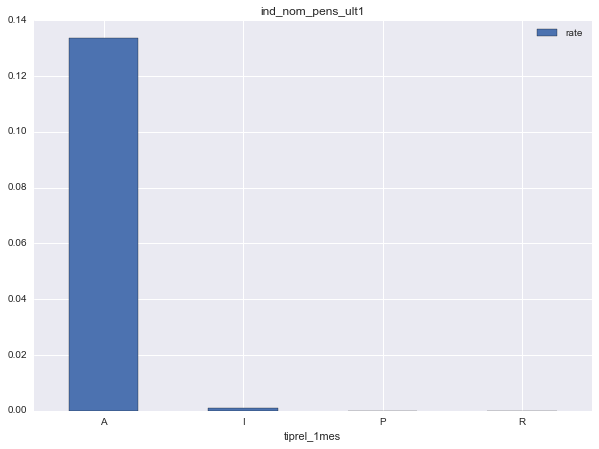

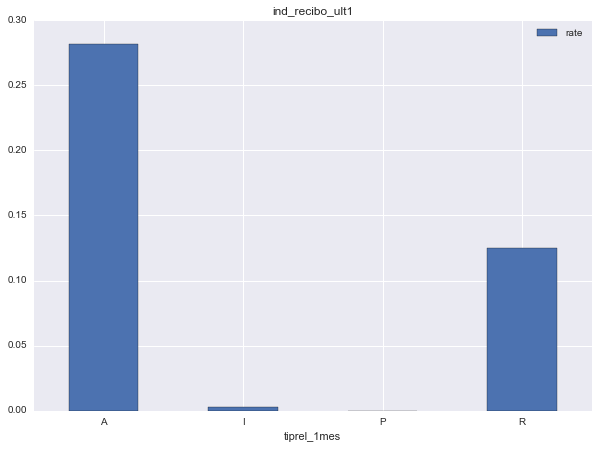

In [290]:
plotRates(ratesByCustRel, 'tiprel_1mes')

## indresi

In [295]:
df.indresi.unique()

array(['S', 'N'], dtype=object)

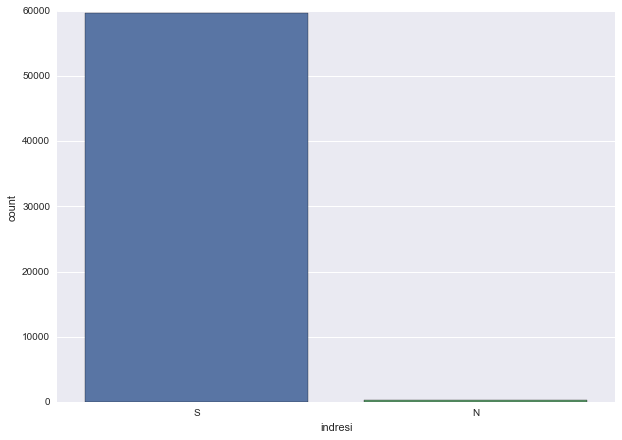

In [294]:
sns.countplot(df.indresi)

## indext

In [297]:
df.indext.unique()

array(['N', 'S'], dtype=object)

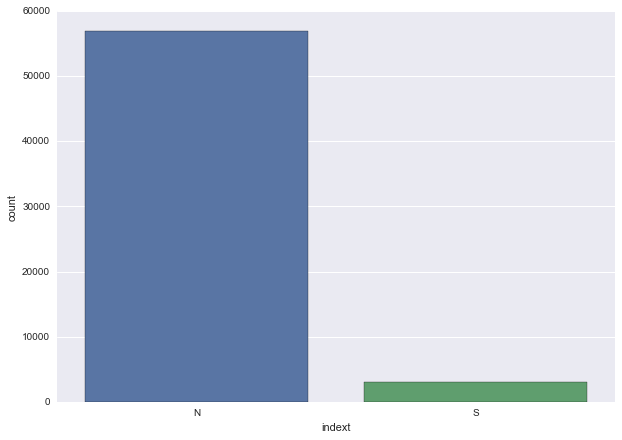

In [298]:
sns.countplot(df.indext)

## canal_entrada

['KAT' 'KHM' 'KAA' 'KHK' 'KHE' 'KFC' 'KHQ' 'KHO' 'KCI' 'KAJ' 'KHN' 'KAB'
 'KAR' 'KFA' 'KHD' 'RED' 'KAG' 'KCC' nan 'KBF' 'KBZ' 'KAS' 'KDO' 'KAY'
 '007' 'KHF' 'KFG' 'KAZ' 'KAW' 'KAI' 'KAE' 'KCH' 'KAH' 'KFJ' 'KED' 'KCG'
 'KDR' 'KAF' 'KBY' 'KHL' 'KFN' 'KAQ' 'KFD' 'KCD' 'KCU' 'KEN' 'KEY' 'KGV'
 '013' 'KFS' 'KBU' 'KDX' 'KAO' 'KES' 'KAD' 'KCM' 'KEJ' 'KDN' 'KBR' 'KCL'
 'KBQ' 'KFP' 'KAN' 'KGX' 'KFL' 'KFF' 'KBJ' 'KHC' 'KDQ' 'KAL' 'KBG' 'KHP'
 'KBE' 'KEZ' 'KAM' 'KCB' 'KFI' 'KAC' 'KDS' 'KAP' 'KBB' 'KEG' 'KGY' 'KFT'
 'KEW' '004' 'KGU' 'KCA' 'KDW' 'KFH' 'KBH' 'KBO' 'KDM' 'KCE' 'KDT' 'KEB'
 'KDU' 'KFR' 'KCN' 'KEL' 'KFK' 'KEV' 'KCS' 'KEK' 'KEH' 'KDP' 'KBV' 'KDD'
 'KDA' 'KEO' 'KEI' 'KDY' 'KFM' 'KCK' 'KDZ' 'KFU' 'KDC' 'KGW' 'KBW' 'KCQ'
 'KDE' 'KEU' 'KFE' 'KAK' 'KDG' 'KCP' 'KCT' 'KBL' 'KDV' 'KEQ' 'KBX' 'KEF'
 'KBM' 'KAU' 'KBD' 'KEC' 'KBS' 'KFB' 'KEA' 'KCO']


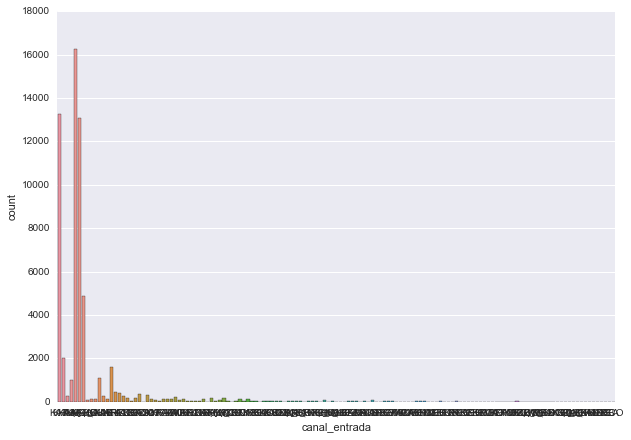

In [302]:
uniqueAndCounts('canal_entrada')

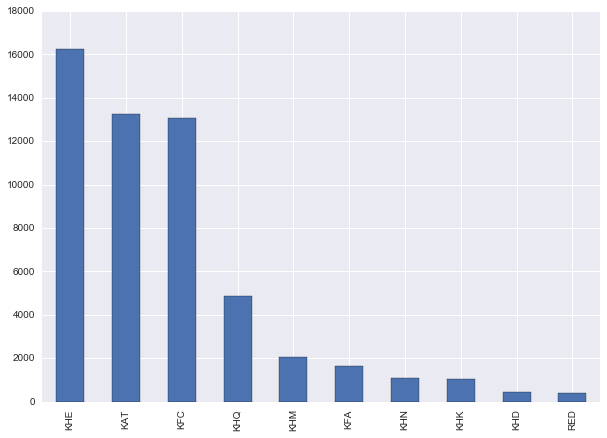

In [307]:
top_canals = df.canal_entrada.value_counts().head(10)

top_canals.plot.bar()

- Seems that the channel of entry is associated with what products a customer is likely to have
- Overall customers entering through KAT and KFC channel see higher adoption rates for many products. Also, other channels have rates of zero for a number of products, while those two channels do not.

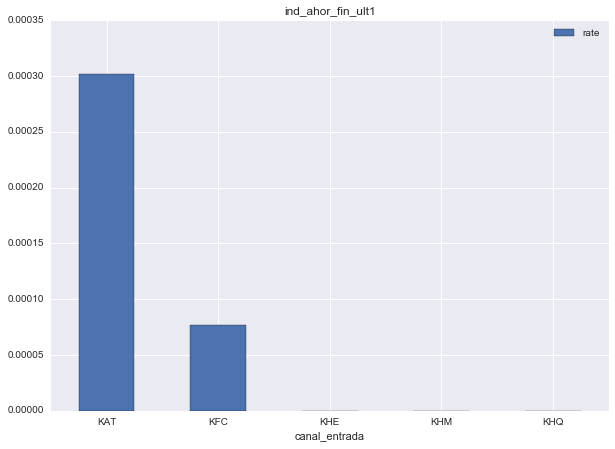

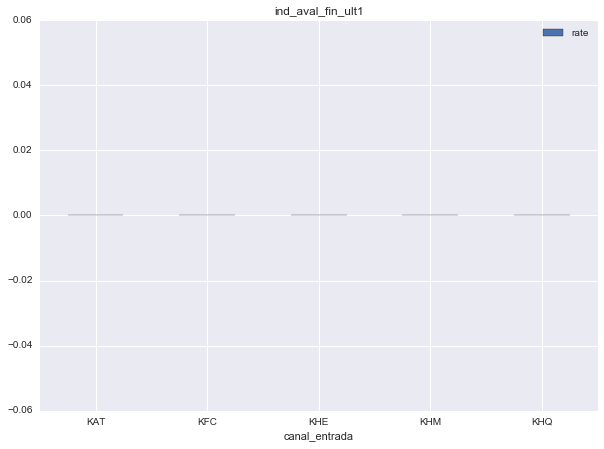

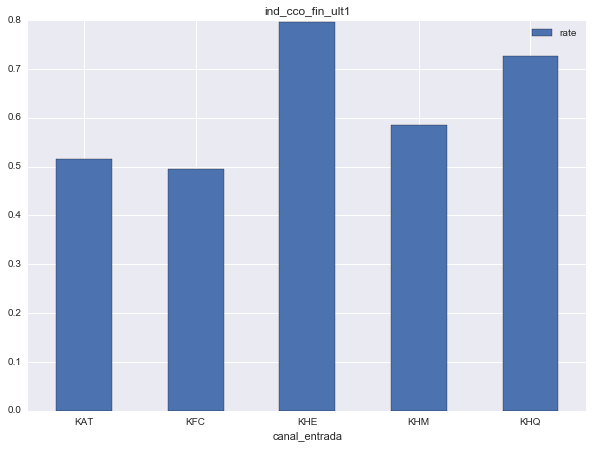

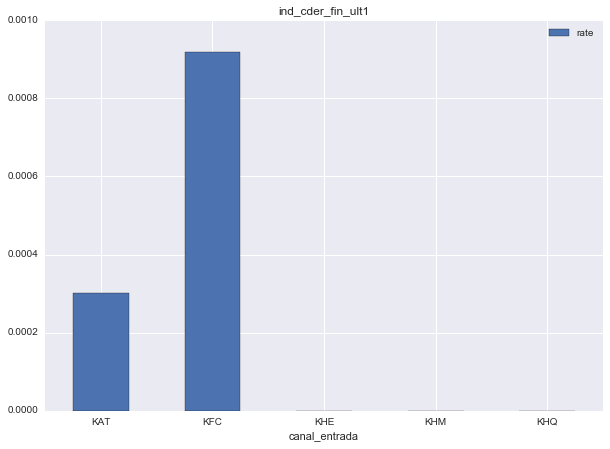

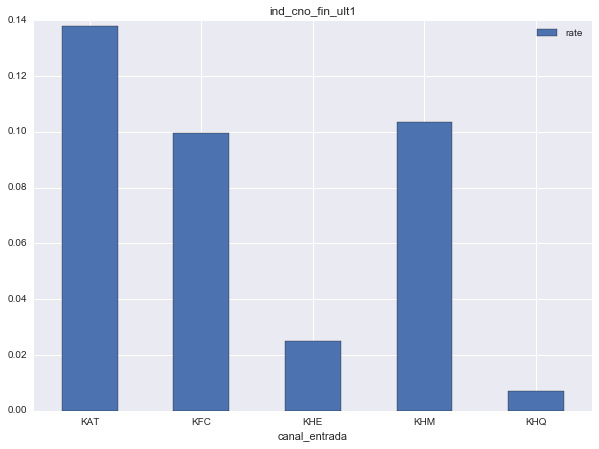

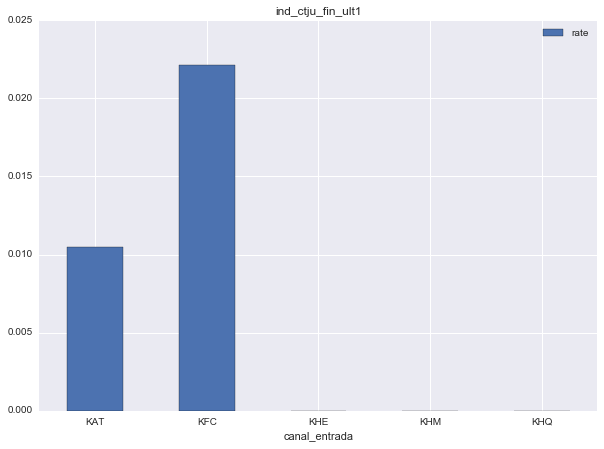

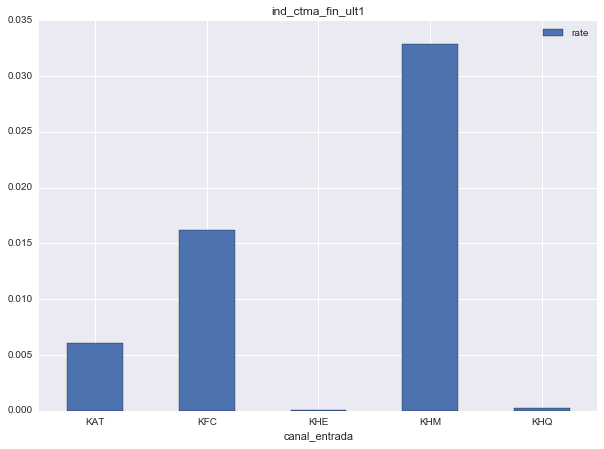

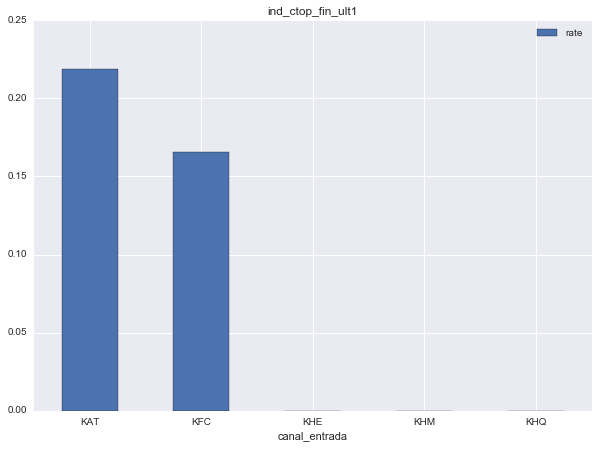

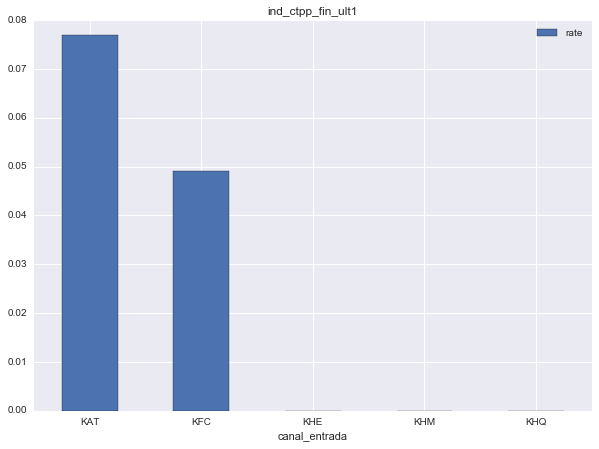

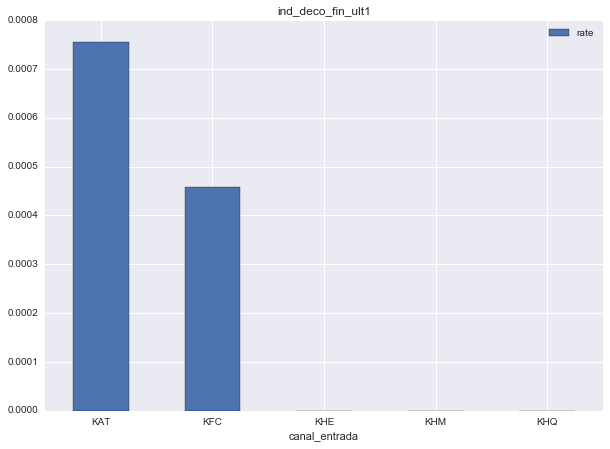

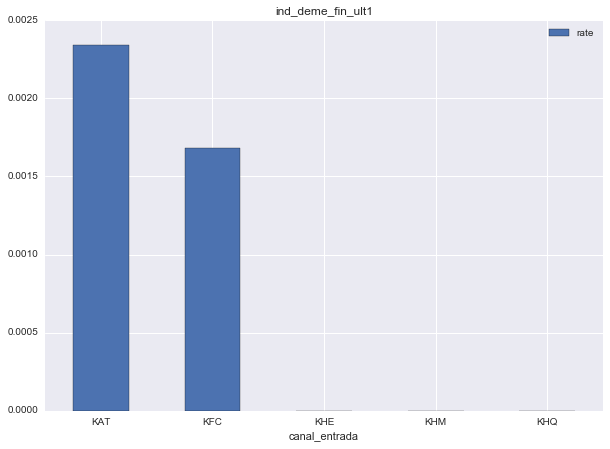

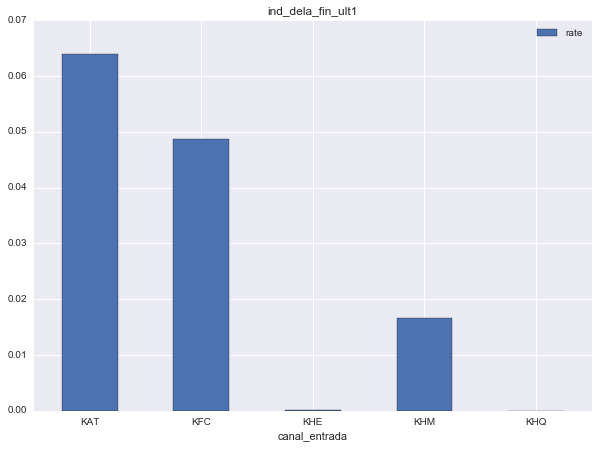

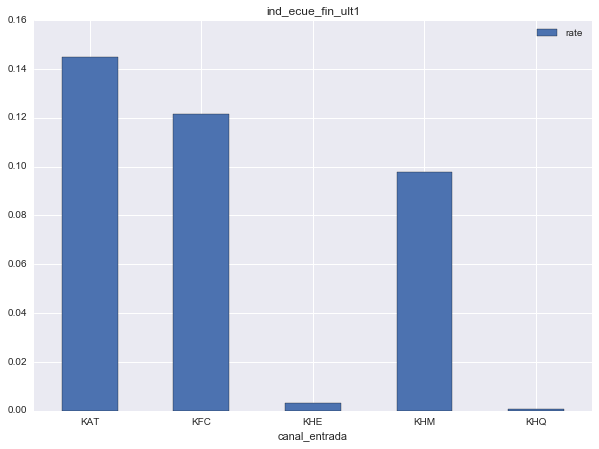

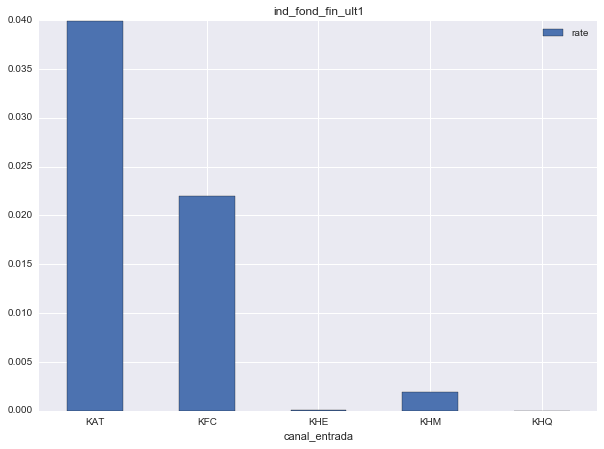

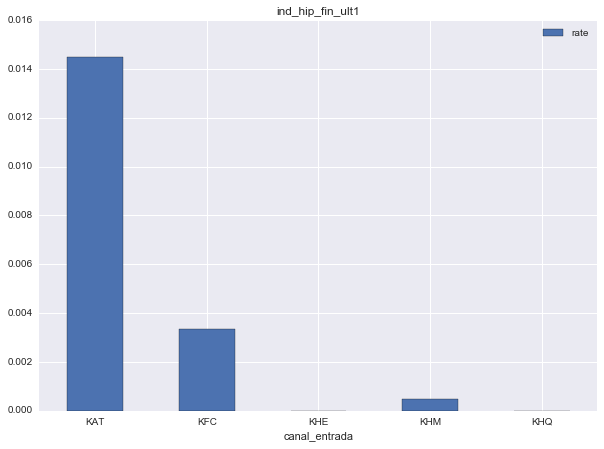

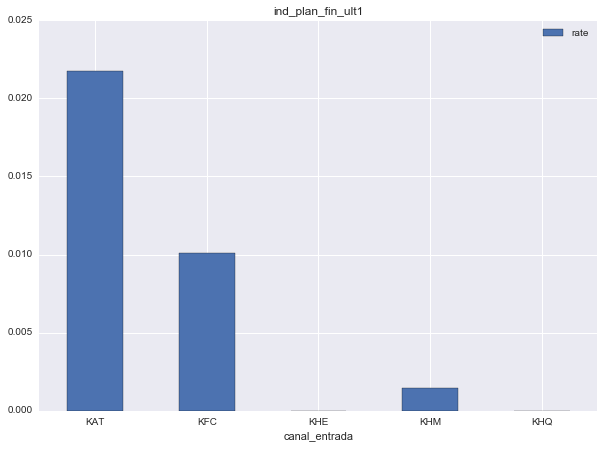

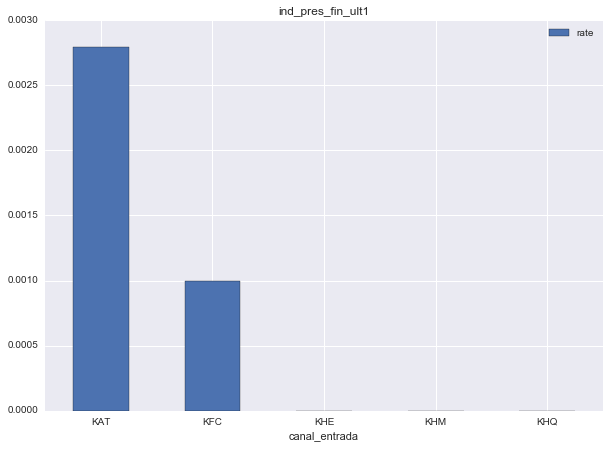

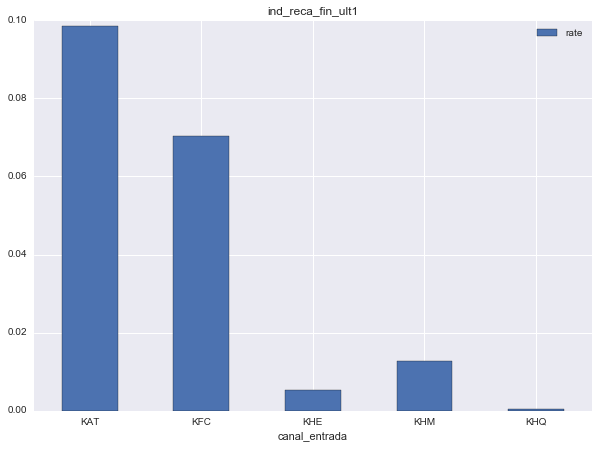

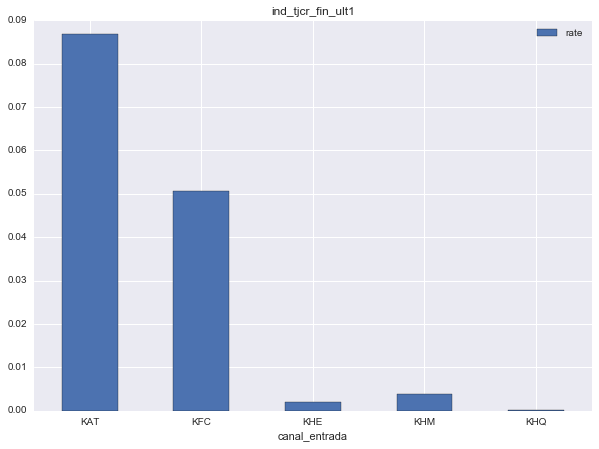

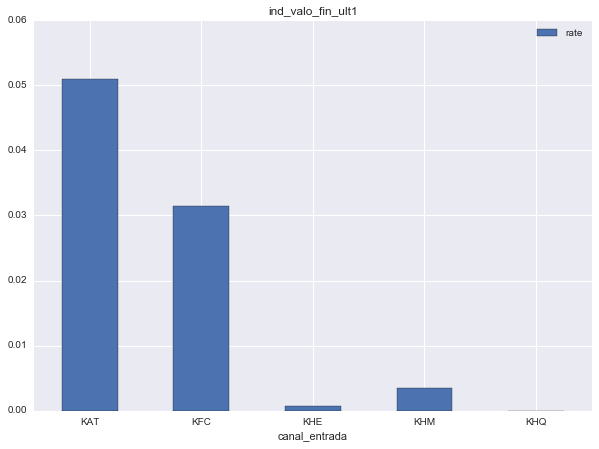

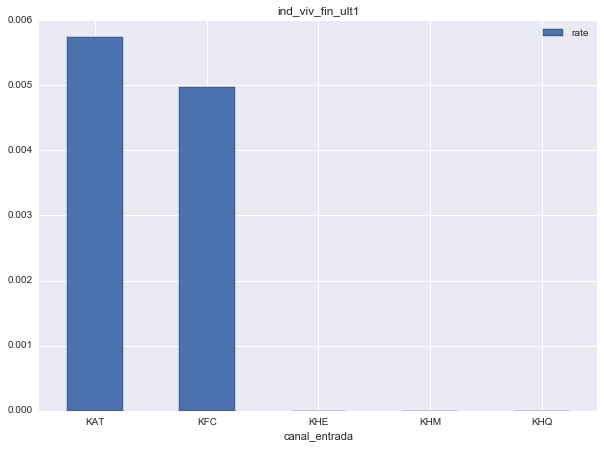

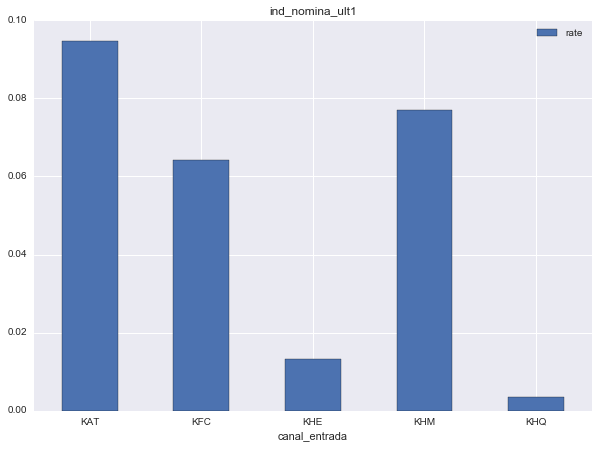

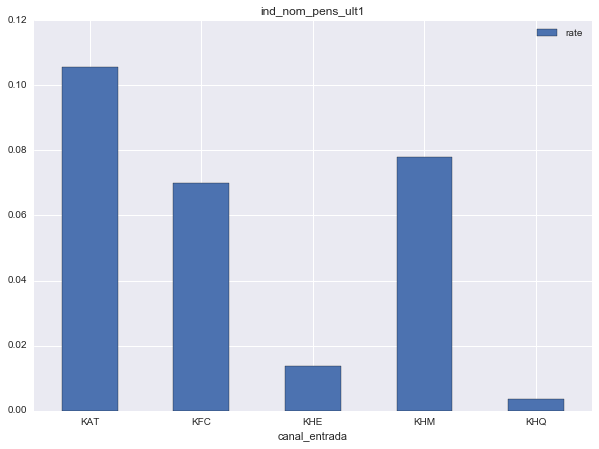

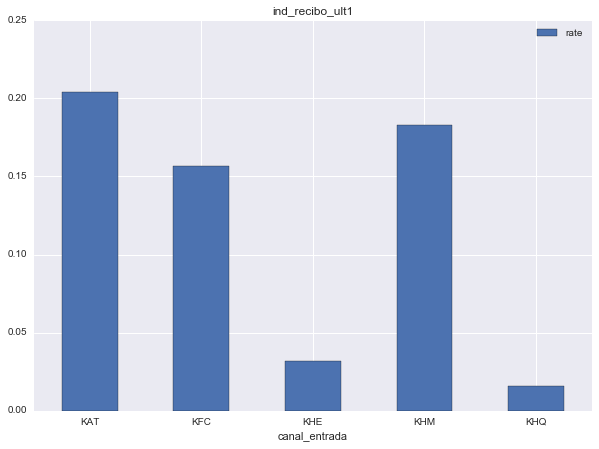

In [311]:
top_canal_names = df.canal_entrada.value_counts().head(5).index.values
mostPopCanalMask = [canal in list(top_canal_names) for canal in df.canal_entrada.values]
mostPopCanals = df.loc[mostPopCanalMask,:]
byCanal = mostPopCanals.groupby('canal_entrada').apply(calcRates).reset_index()
byCanal = meltRates(byCanal,'canal_entrada')
plotRates(byCanal, 'canal_entrada')

## indfall

If they're dead, they're not adding any more products.

['N' 'S']


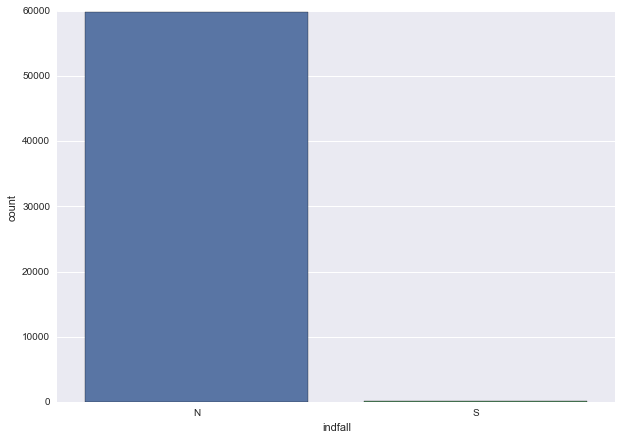

In [321]:
uniqueAndCounts('indfall')

## tipodom

Maybe drop this column

In [326]:
print(df.tipodom.unique())
print(df.tipodom.isnull().sum())

[1]
0


## cod_prov/nomprov

Most customers from Madrid. Decent contingent from Barcelona.

Could try to see if there is a difference by city or between the big cities and smaller places. But if it's fake data, I'm not sure it's worth the effort?

[  8.  28.  44.  29.   9.  36.  nan  30.  10.  33.  47.  25.   5.  35.  41.
  37.  18.   3.  13.  38.  12.  50.  15.  16.  27.  40.  46.  14.   2.  45.
  23.  21.  34.  17.  26.   7.  31.   1.   6.  39.  49.  32.  11.  43.  48.
   4.  19.  24.  20.  22.  51.  42.  52.]


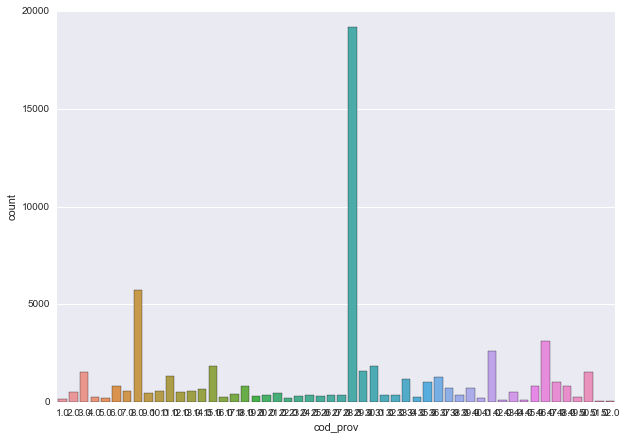

In [327]:
uniqueAndCounts('cod_prov')

['BARCELONA' 'MADRID' 'TERUEL' 'MALAGA' 'BURGOS' 'PONTEVEDRA' nan 'MURCIA'
 'CACERES' 'ASTURIAS' 'VALLADOLID' 'LERIDA' 'AVILA' 'PALMAS, LAS' 'SEVILLA'
 'SALAMANCA' 'GRANADA' 'ALICANTE' 'CIUDAD REAL' 'SANTA CRUZ DE TENERIFE'
 'CASTELLON' 'ZARAGOZA' 'CORUÑA, A' 'CUENCA' 'LUGO' 'SEGOVIA' 'VALENCIA'
 'CORDOBA' 'ALBACETE' 'TOLEDO' 'JAEN' 'HUELVA' 'PALENCIA' 'GIRONA'
 'RIOJA, LA' 'BALEARS, ILLES' 'NAVARRA' 'ALAVA' 'BADAJOZ' 'CANTABRIA'
 'ZAMORA' 'OURENSE' 'CADIZ' 'TARRAGONA' 'BIZKAIA' 'ALMERIA' 'GUADALAJARA'
 'LEON' 'GIPUZKOA' 'HUESCA' 'CEUTA' 'SORIA' 'MELILLA']


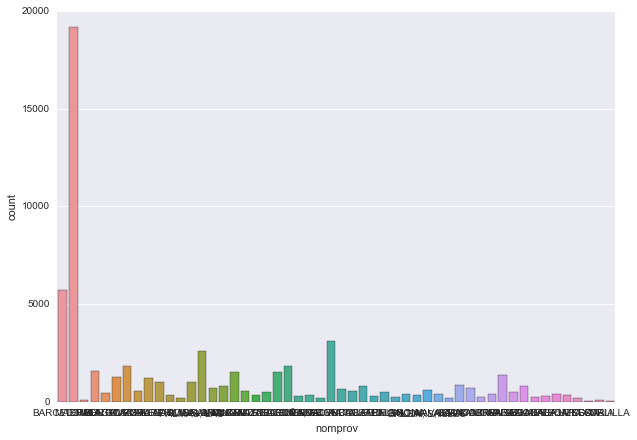

In [329]:
uniqueAndCounts('nomprov')

Customers from the provinces with the most customers tend to be more likely than customers from less-represented provinces to have many of the products. Maybe more products are available in areas where santander has the largest presence? Or a difference in marketing? Or difference between city and more rural areas? Or maybe just a result of creating the fake data? 

In [338]:
top_provs_names = df.nomprov.value_counts().index.values[:5]
bottom_provs_names = df.nomprov.value_counts().index.values[-10:]

In [344]:
top_prov_mask = [prov in top_provs_names for prov in df.nomprov]
bottom_prov_mask = [prov in bottom_provs_names for prov in df.nomprov]
top_provs = df.loc[top_prov_mask,:]
bottom_provs = df.loc[bottom_prov_mask,:]
top_provs['type'] = 'top'
bottom_provs['type'] = 'bottom'
byProvType = pd.concat([top_provs, bottom_provs]).groupby('type').apply(calcRates).reset_index()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


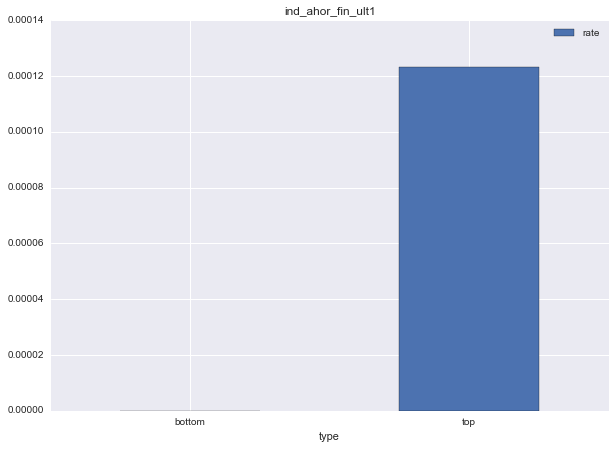

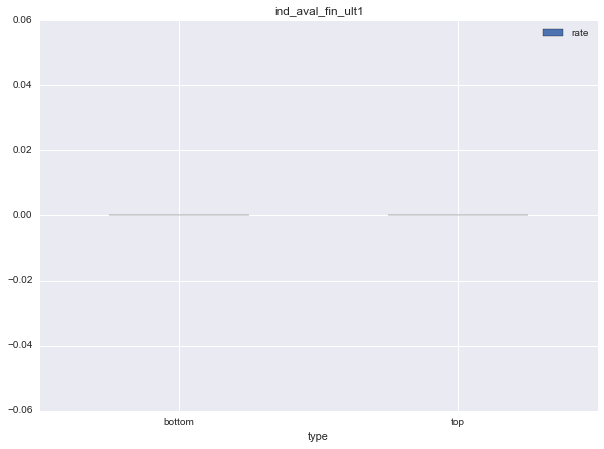

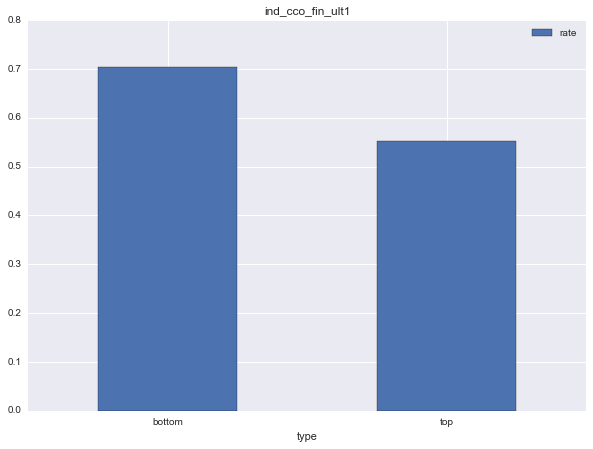

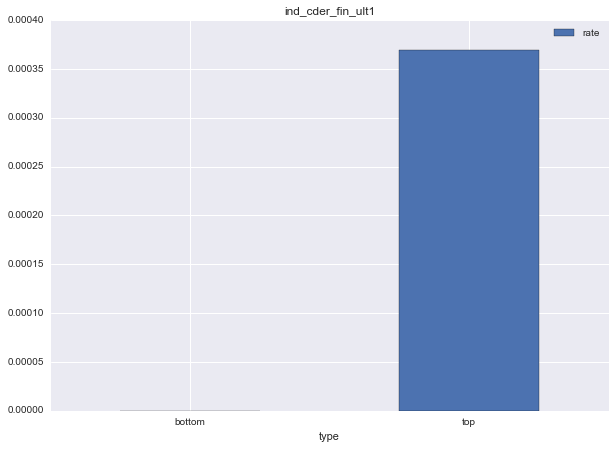

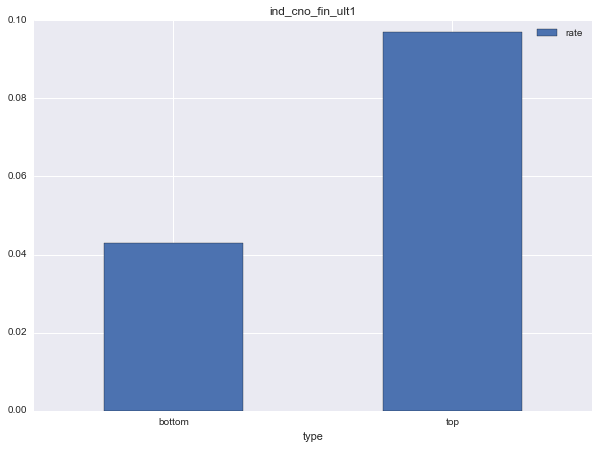

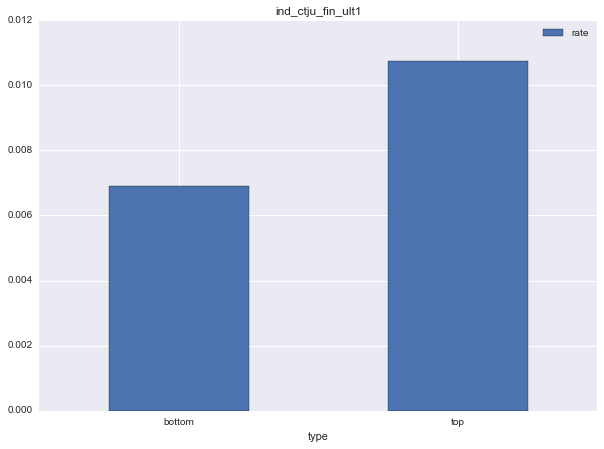

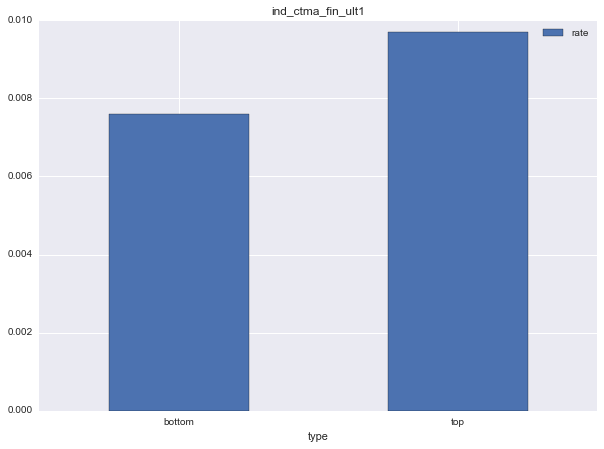

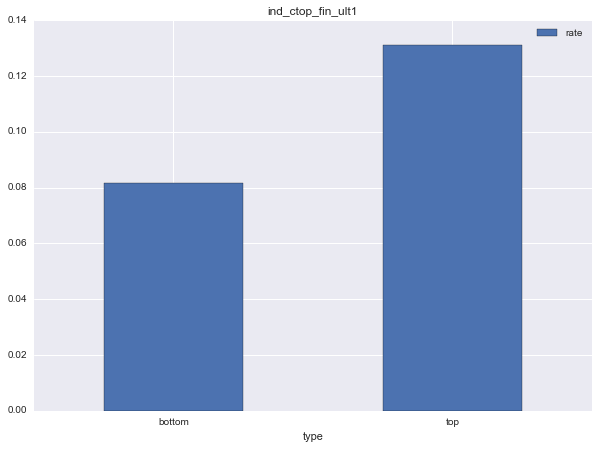

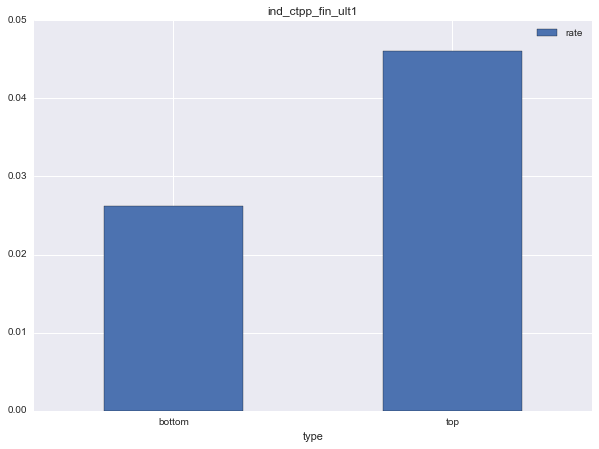

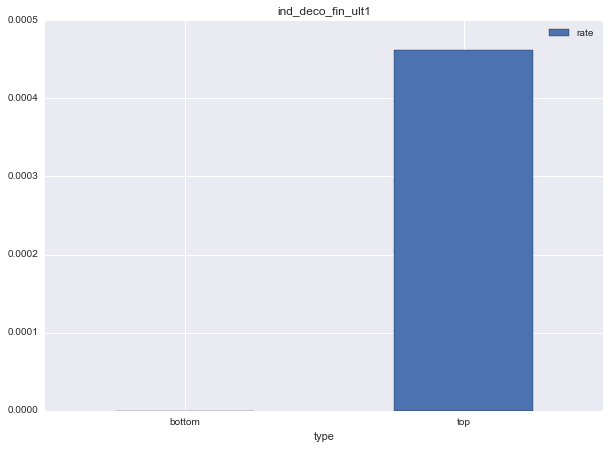

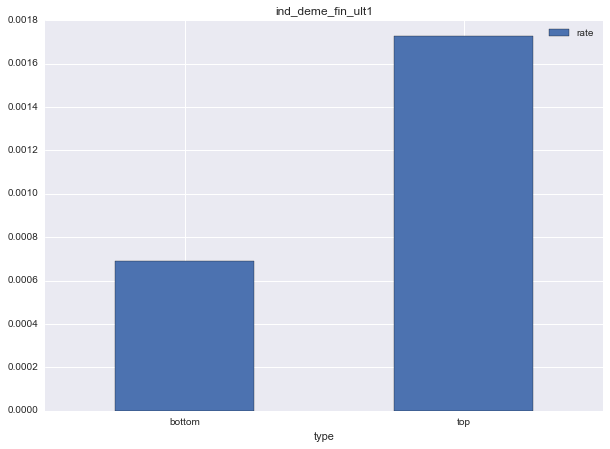

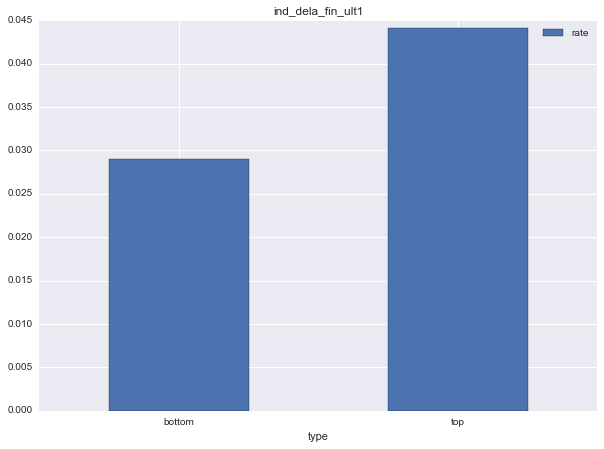

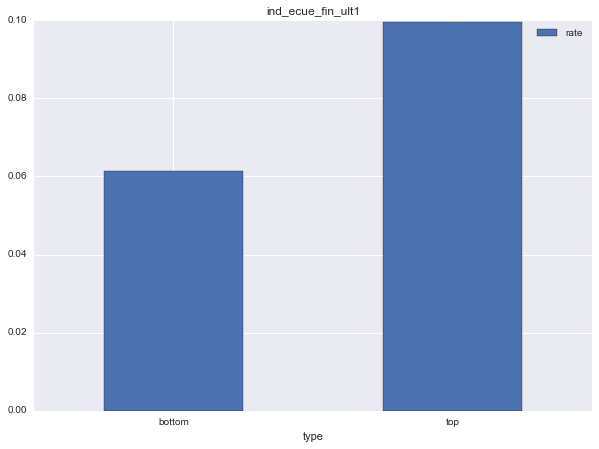

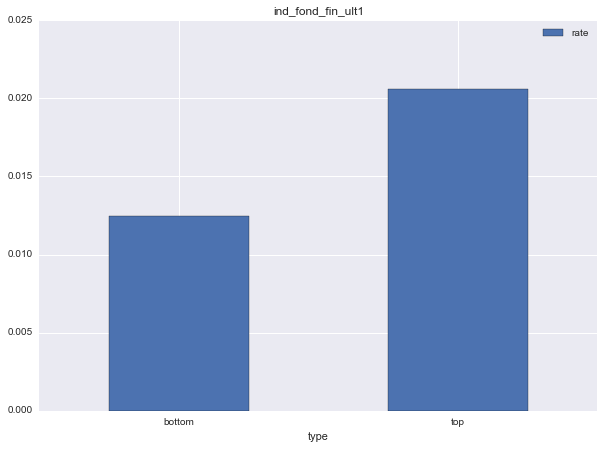

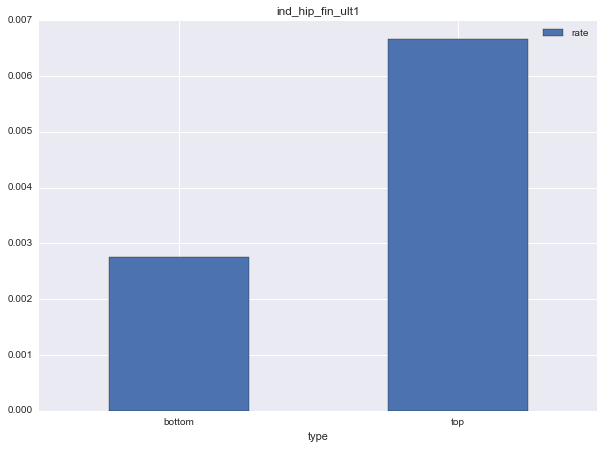

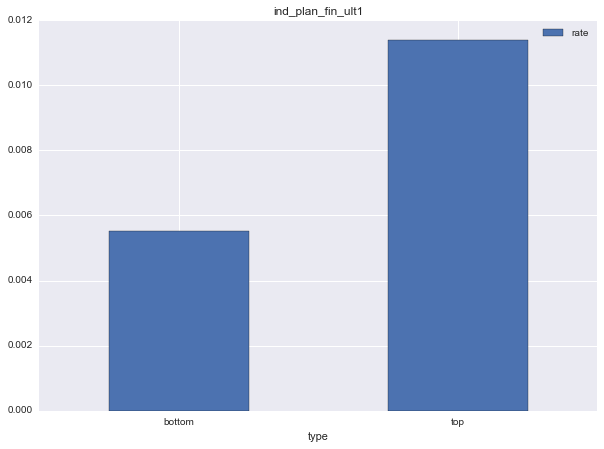

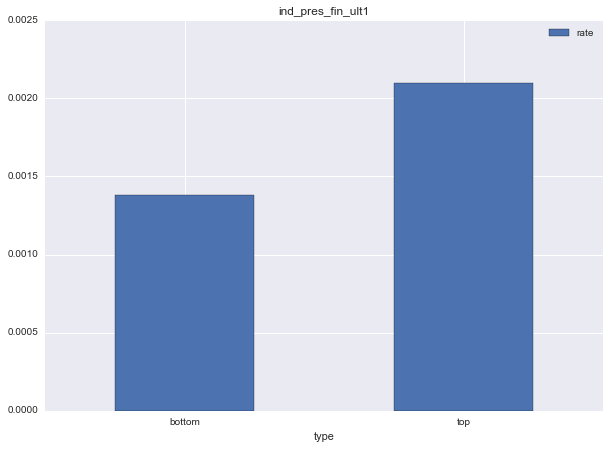

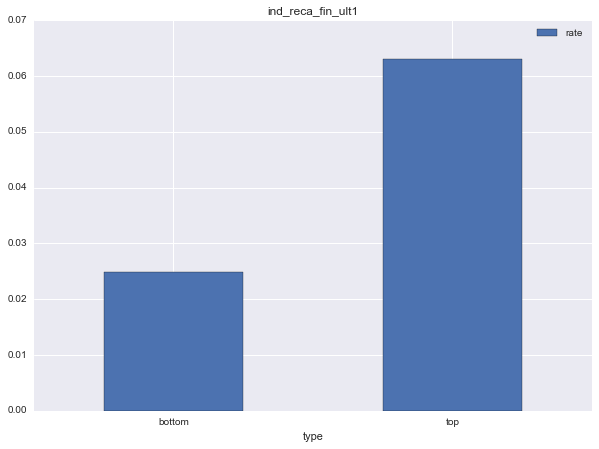

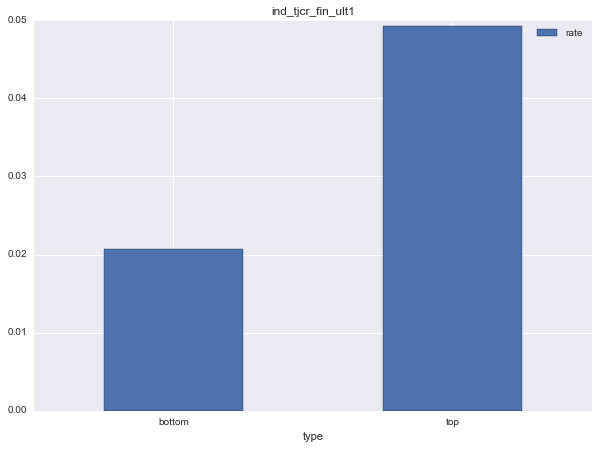

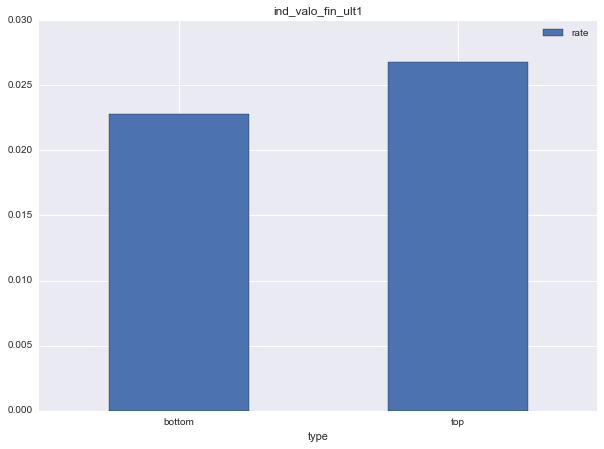

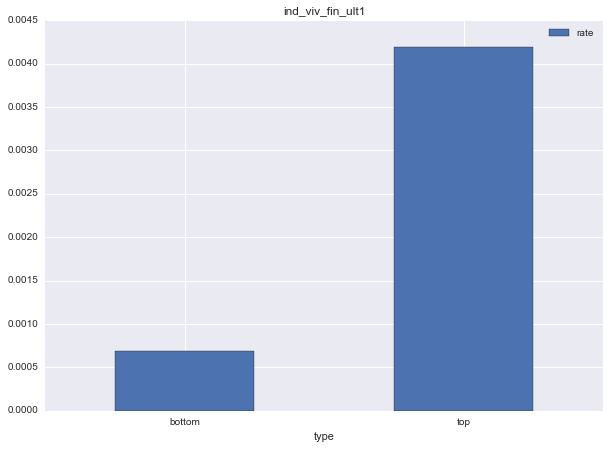

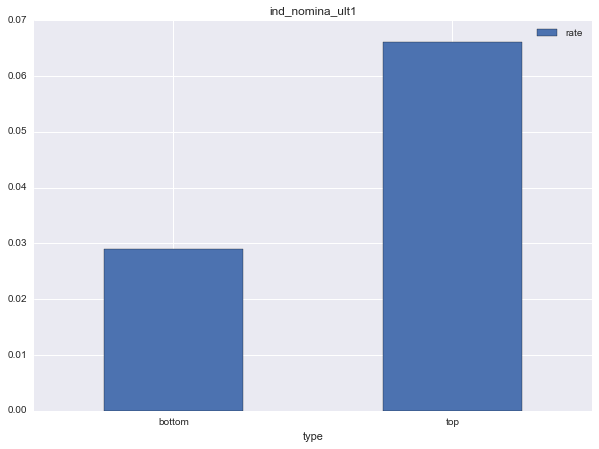

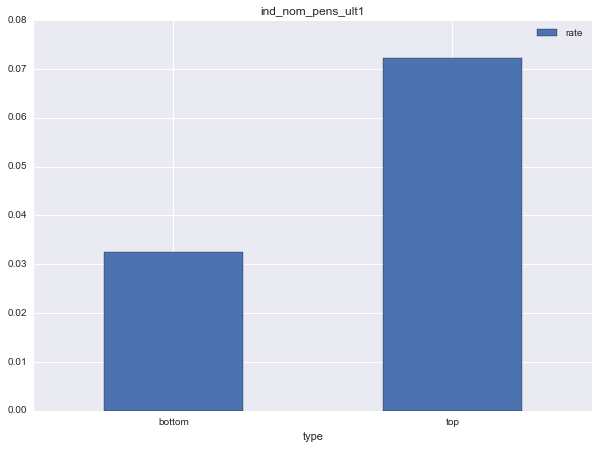

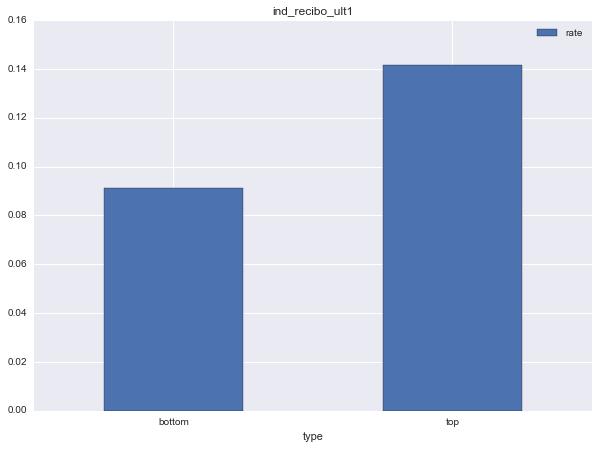

In [348]:
melted = pd.melt(byProvType, id_vars=['type'], value_name='rate', var_name='product')
#byProvType = meltRates(byProvType, 'type')
plotRates(melted, 'type')

## ind_actividad_cliente

More customers are inactive than active. What does inactive mean?

Inactive customers a much more likely to have products.

[1 0]


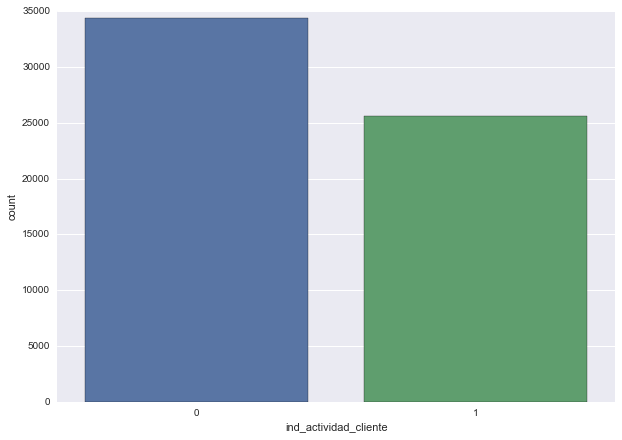

In [349]:
uniqueAndCounts('ind_actividad_cliente')

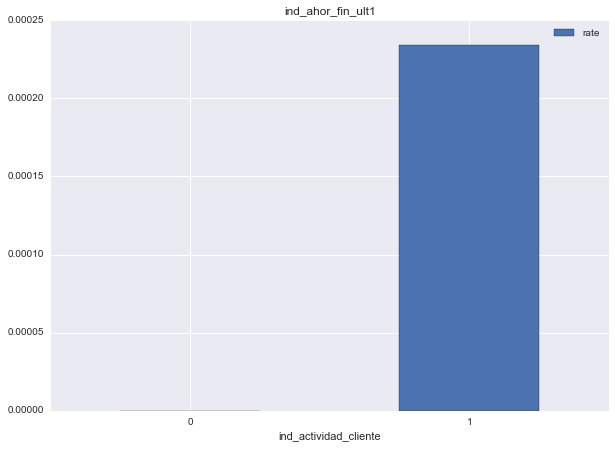

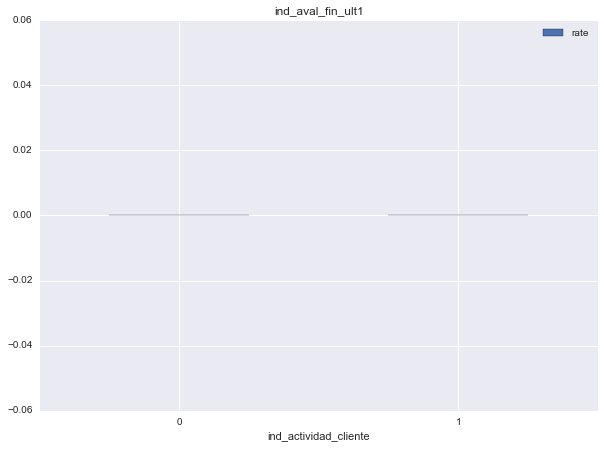

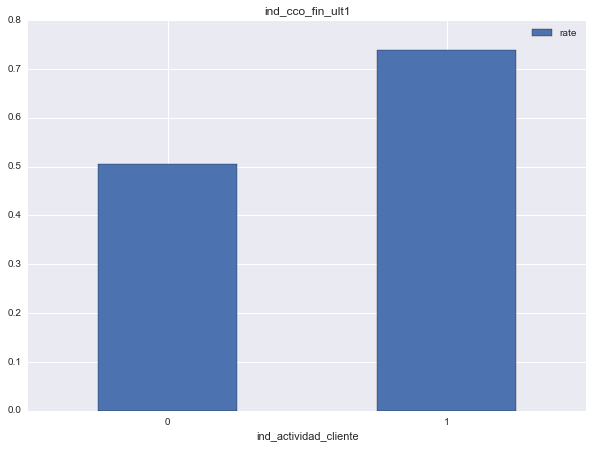

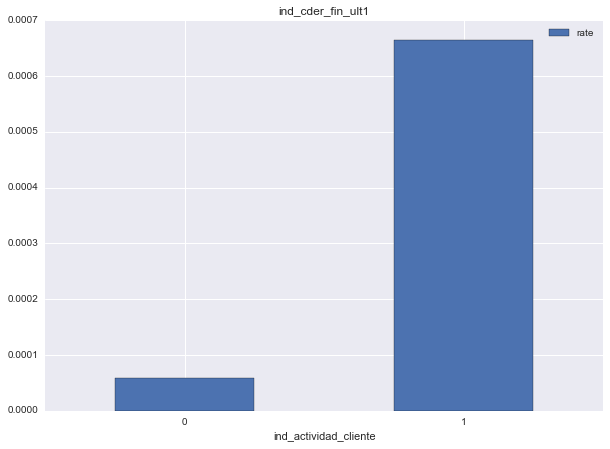

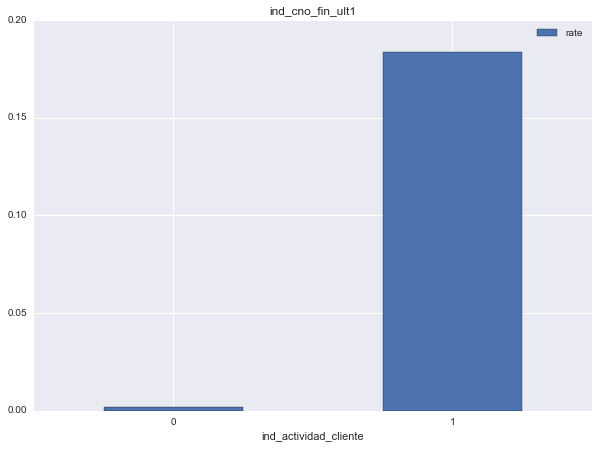

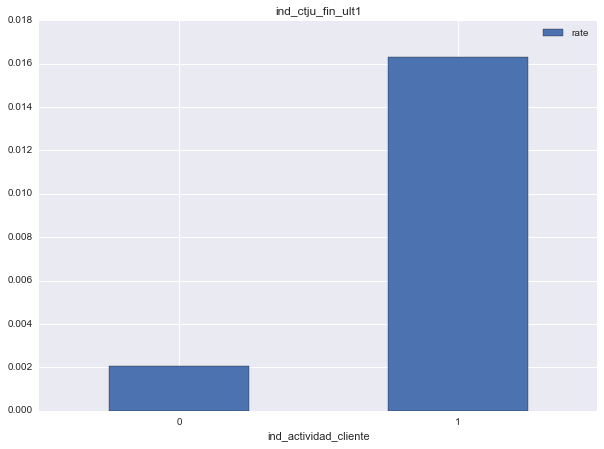

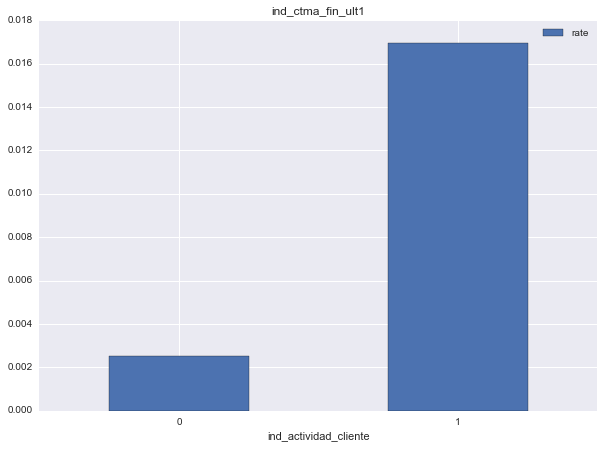

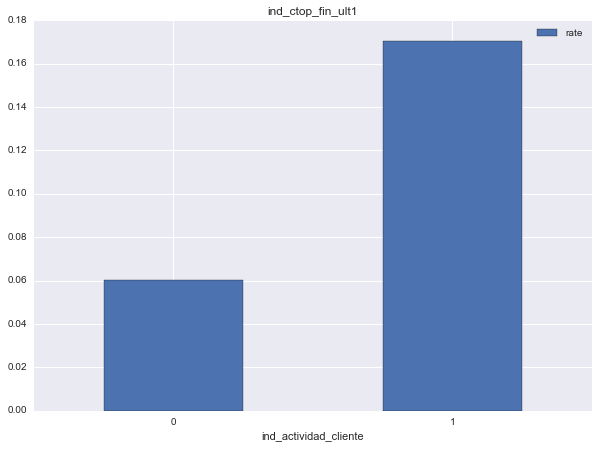

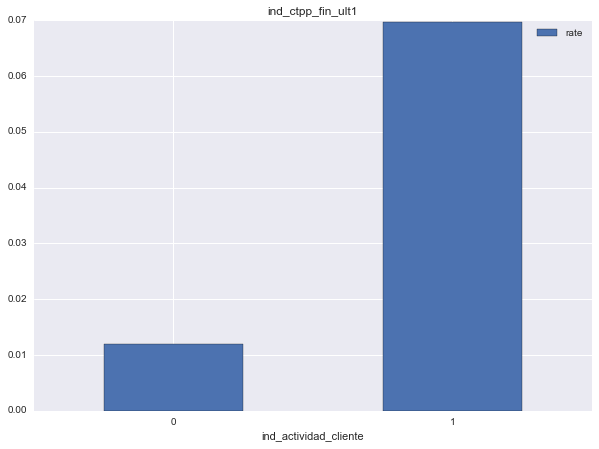

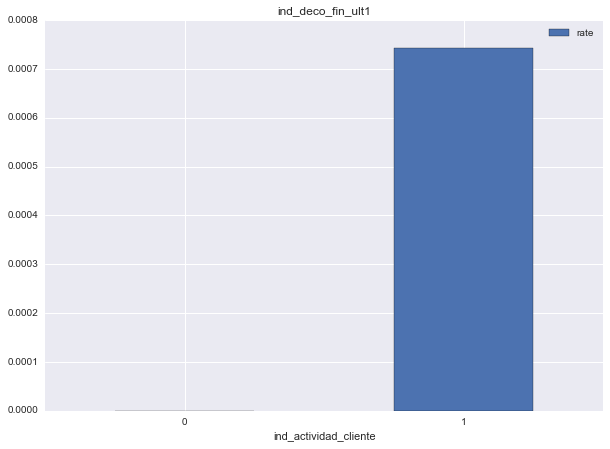

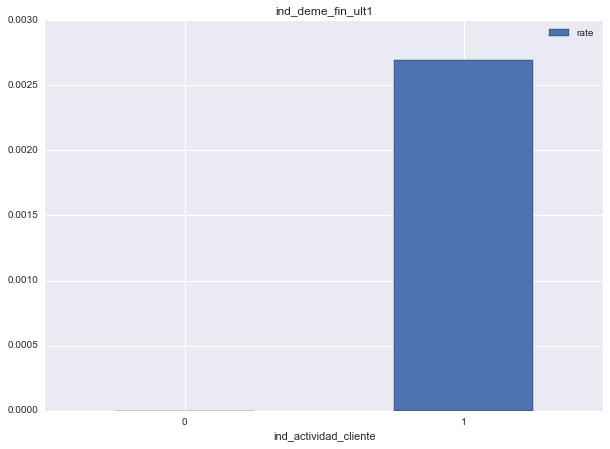

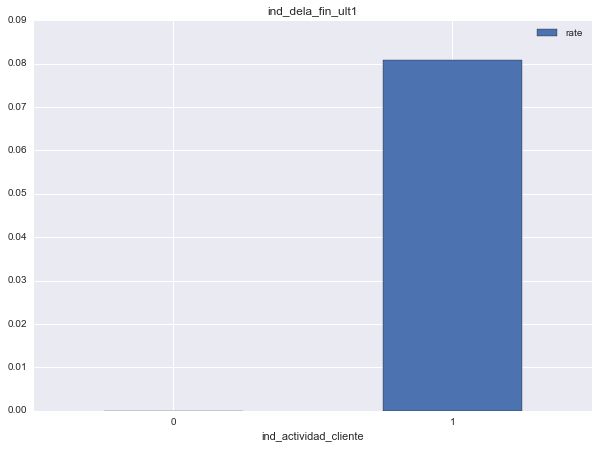

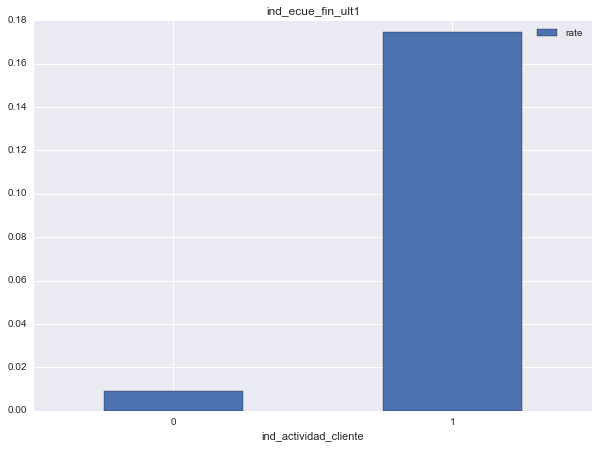

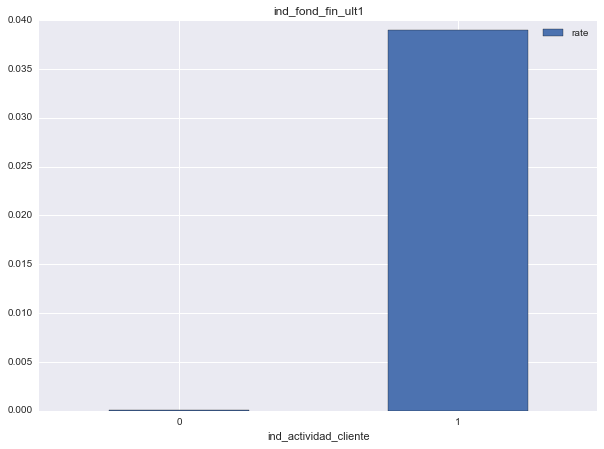

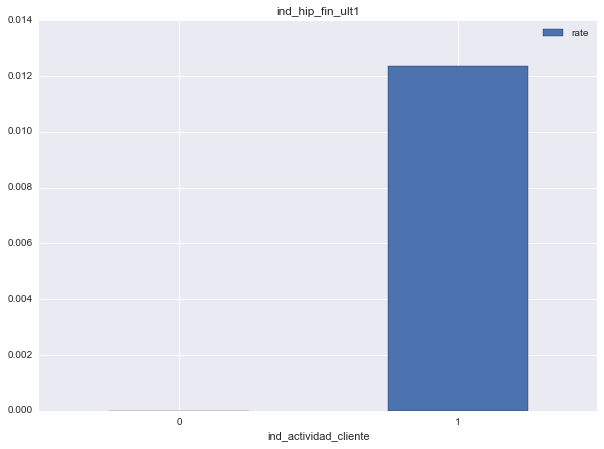

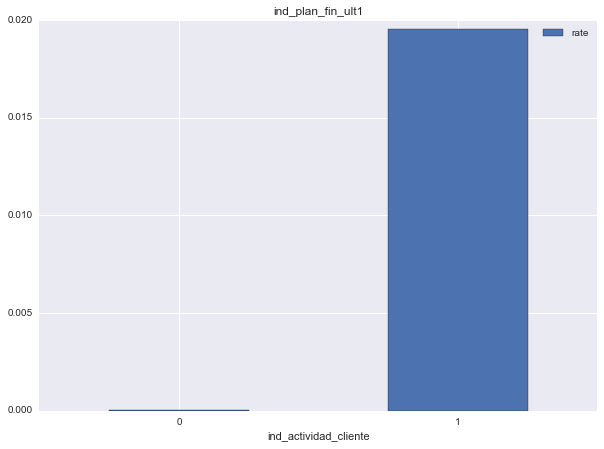

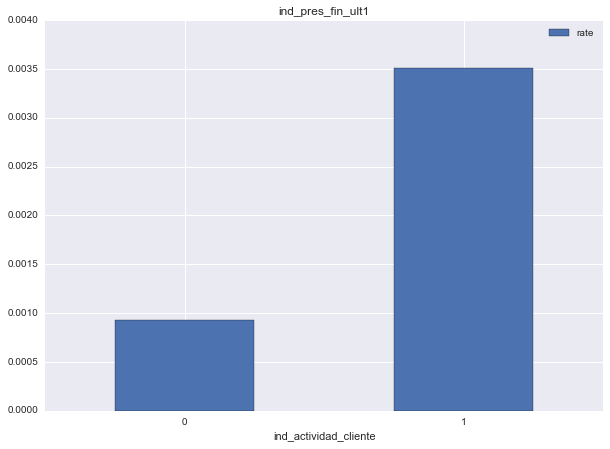

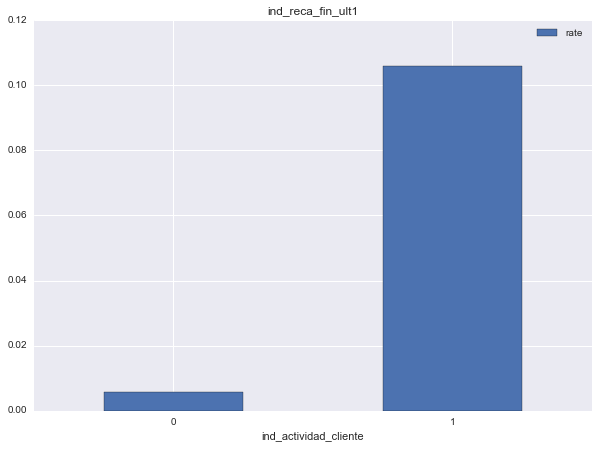

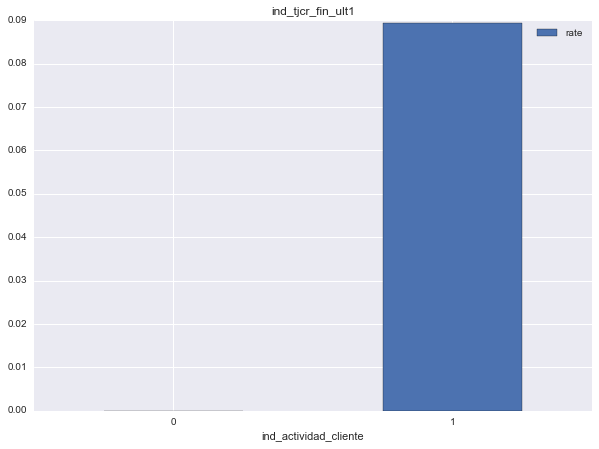

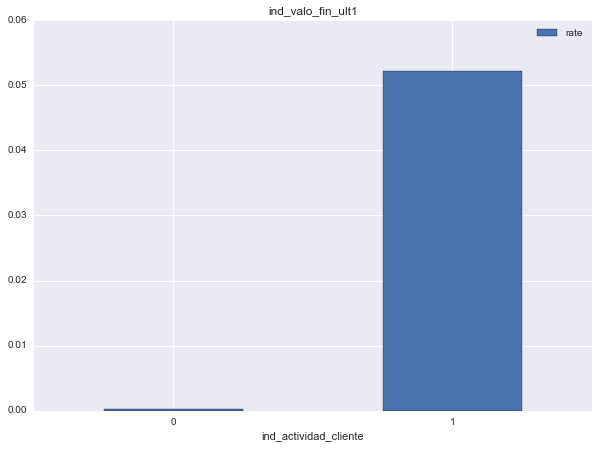

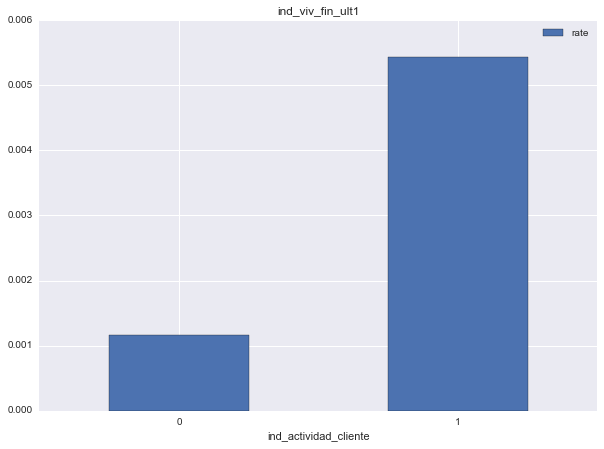

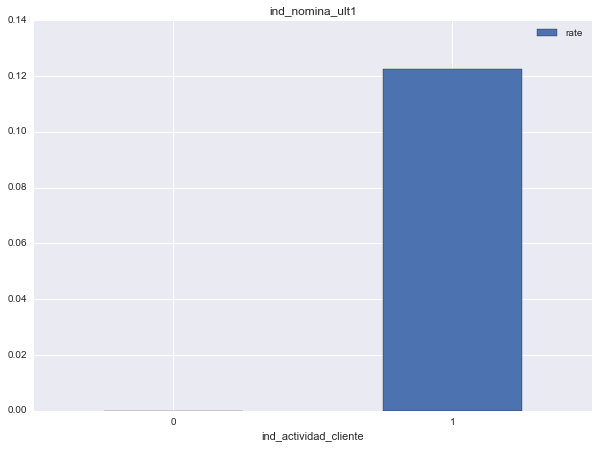

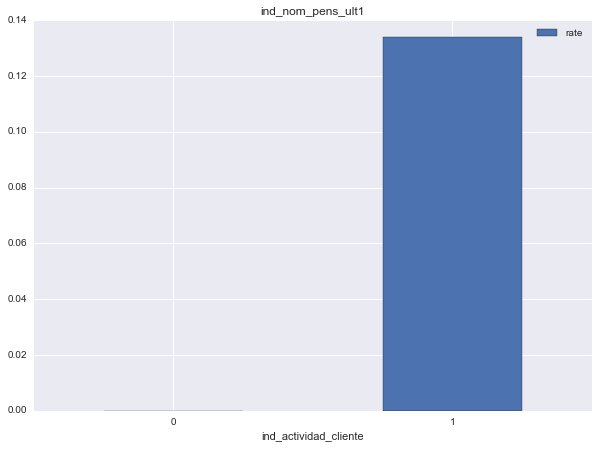

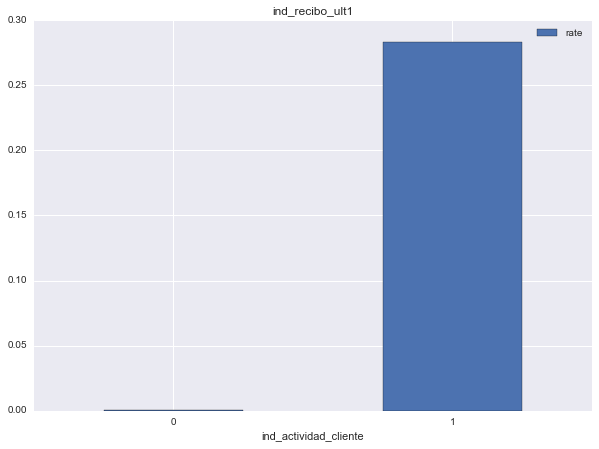

In [350]:
byActivity = df.groupby('ind_actividad_cliente').apply(calcRates).reset_index()
byActivity = meltRates(byActivity, 'ind_actividad_cliente')
plotRates(byActivity, 'ind_actividad_cliente')

## renta

Fill with average, maybe?

For many products, the more you make, the more likely you are to have it.


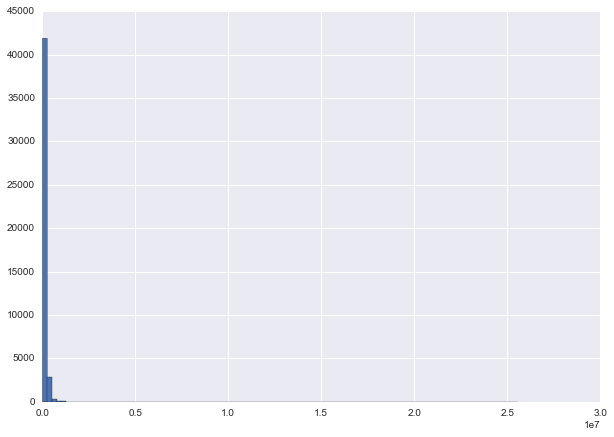

In [355]:
df.renta.hist(bins=100)

In [360]:
df.renta.describe()

count    4.525500e+04
mean     1.336451e+05
std      2.304703e+05
min      6.611580e+03
25%      6.858707e+04
50%      1.012854e+05
75%      1.555073e+05
max      2.554725e+07
Name: renta, dtype: float64

In [370]:
df['renta_quant'] =  pd.qcut(df.renta, 10,labels=False)

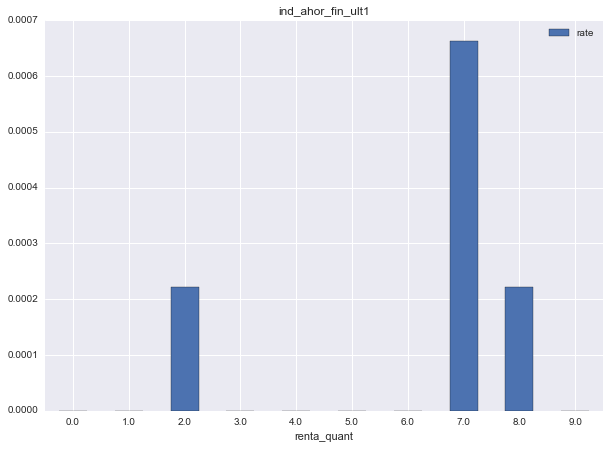

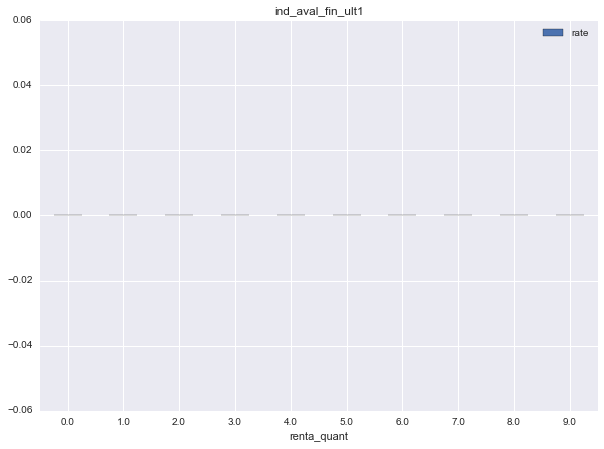

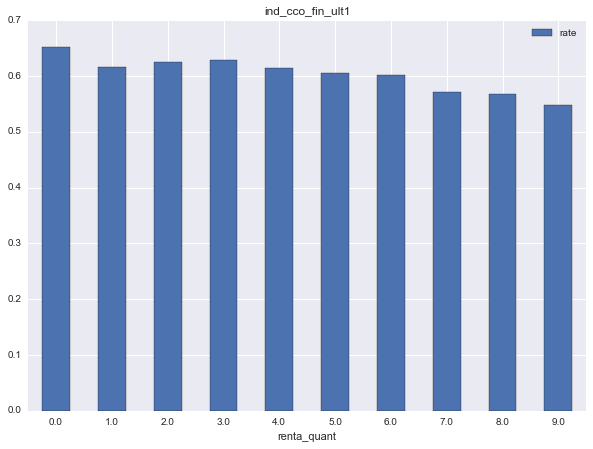

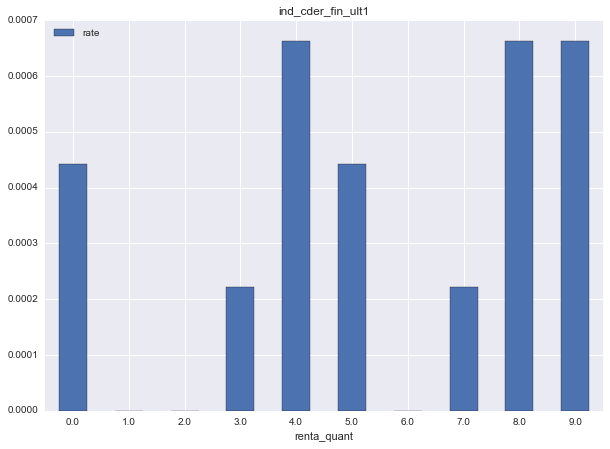

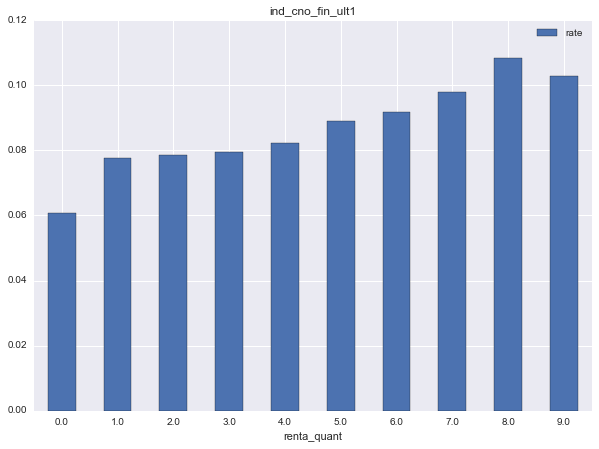

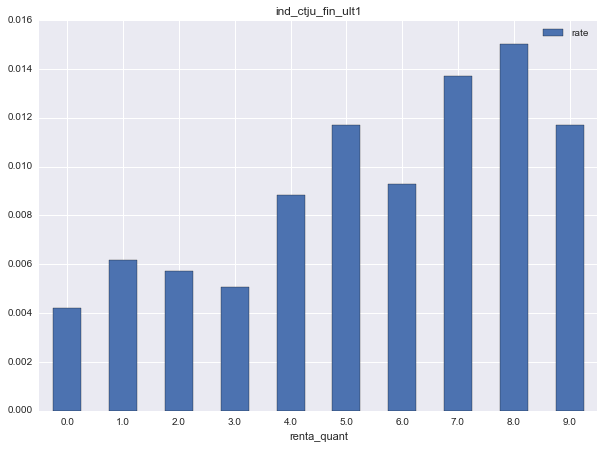

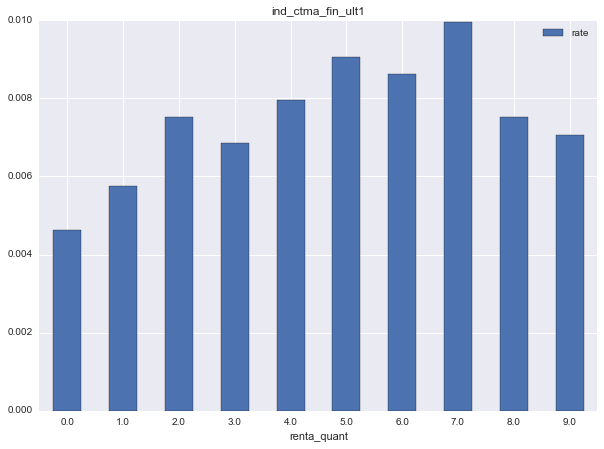

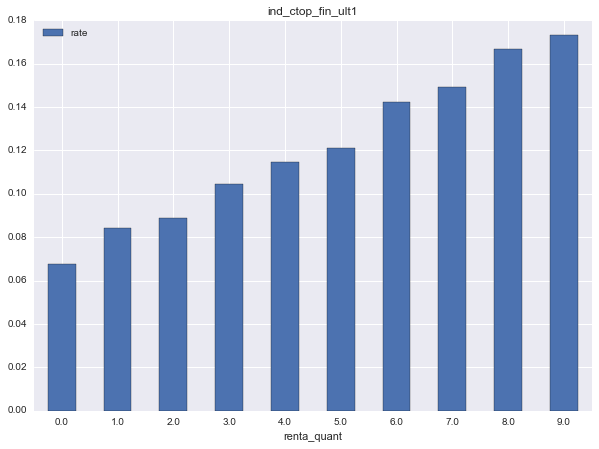

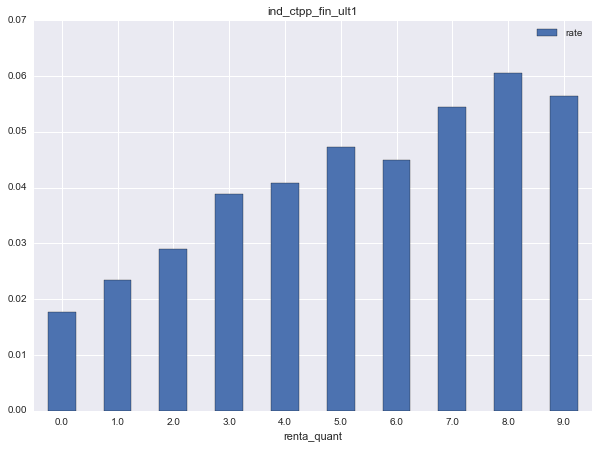

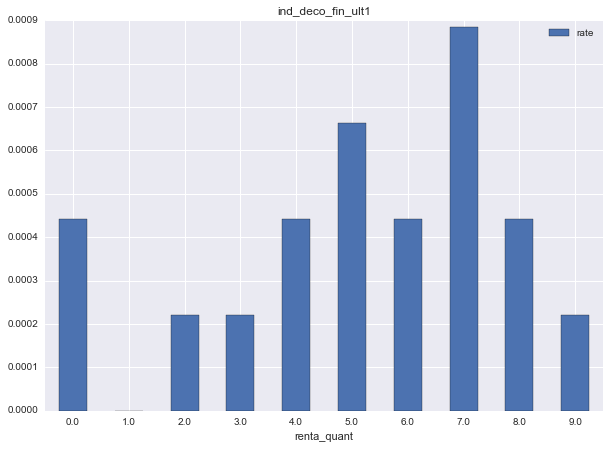

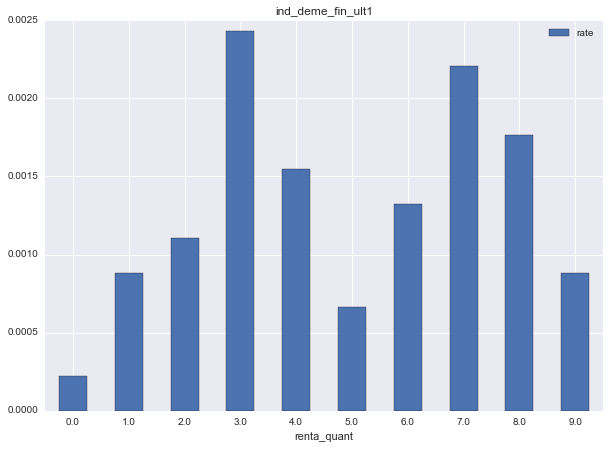

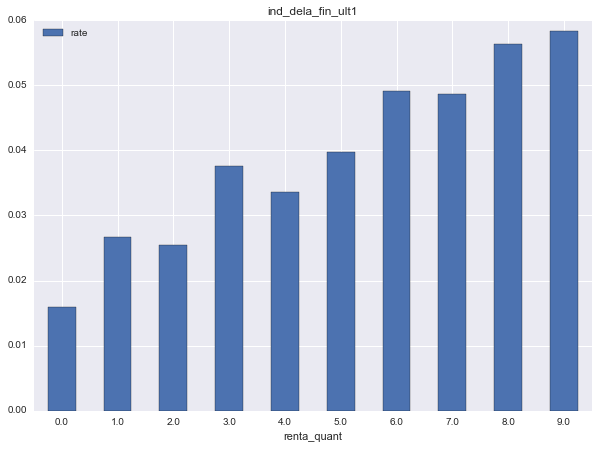

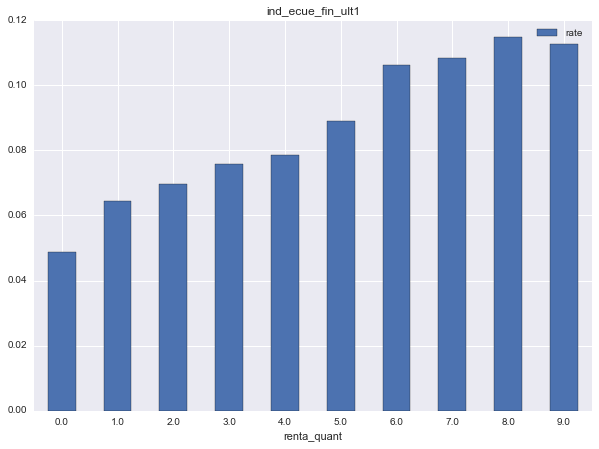

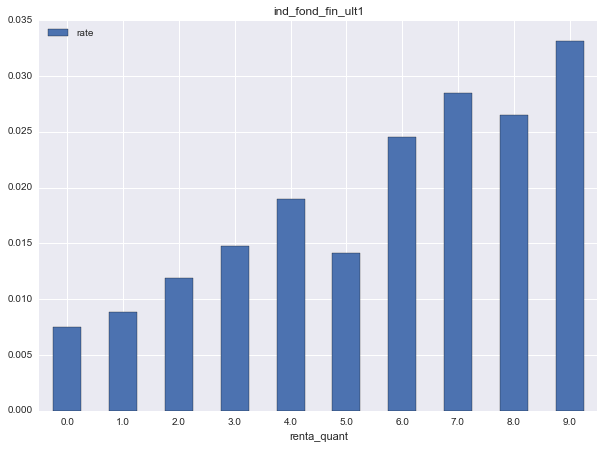

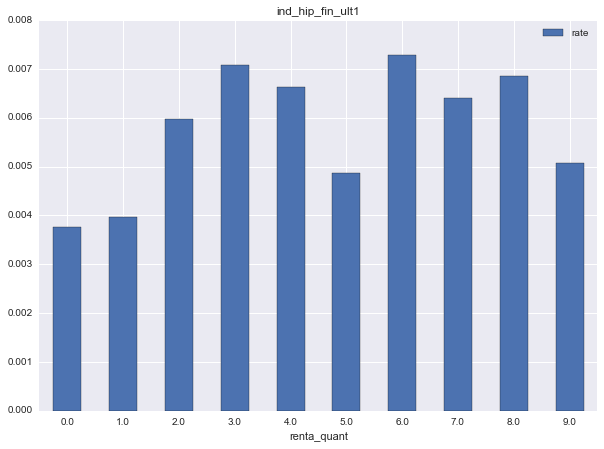

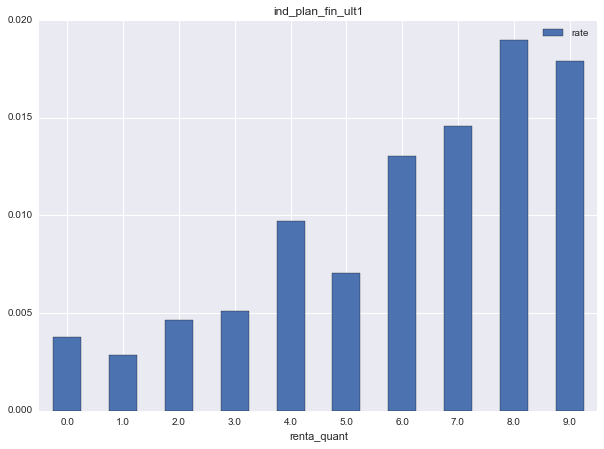

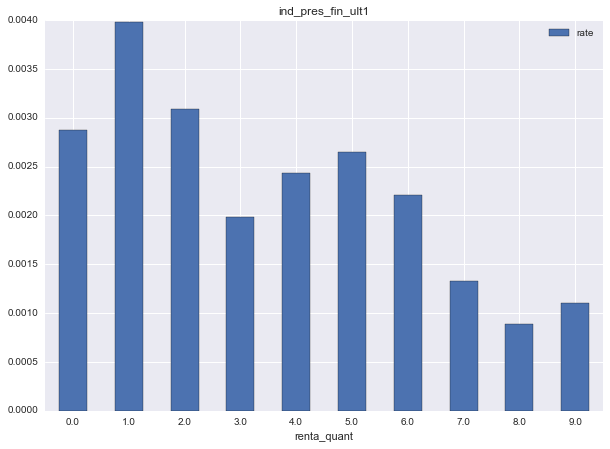

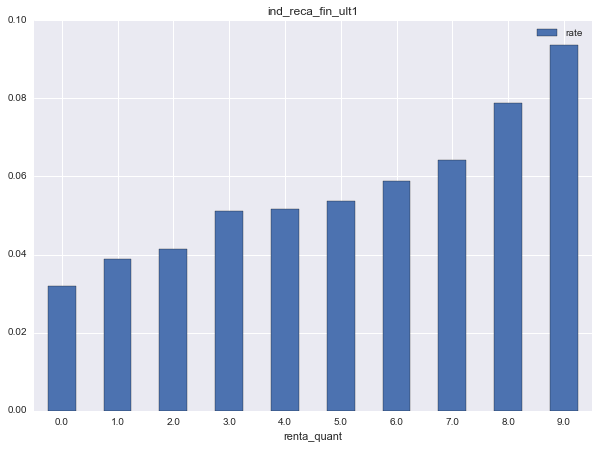

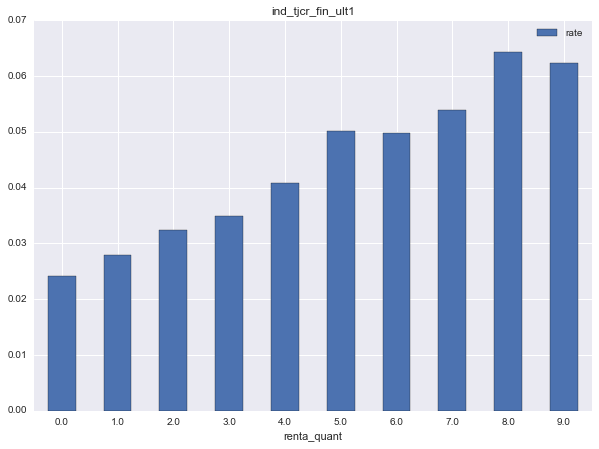

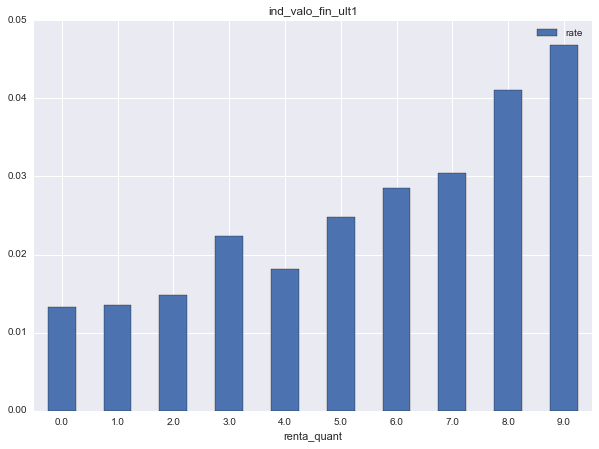

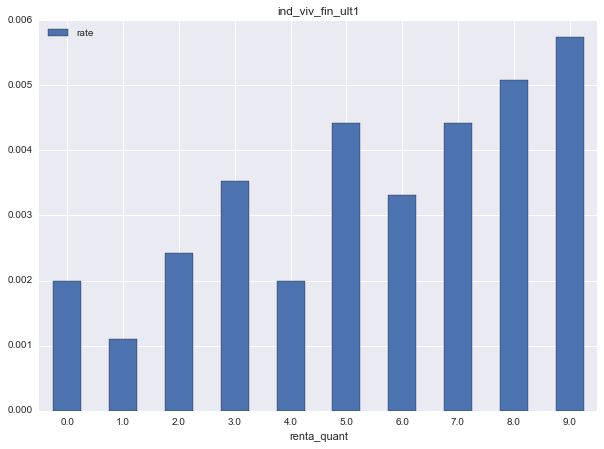

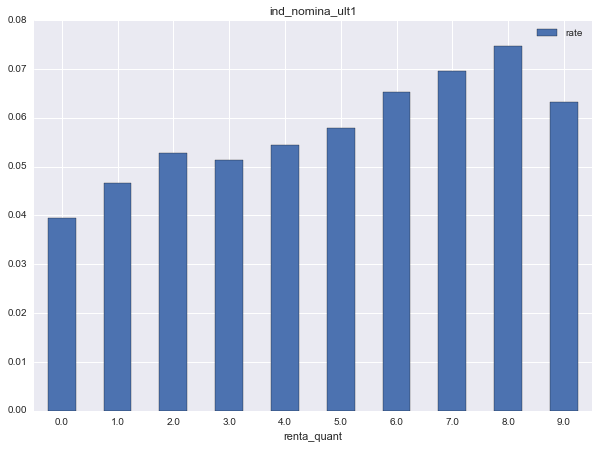

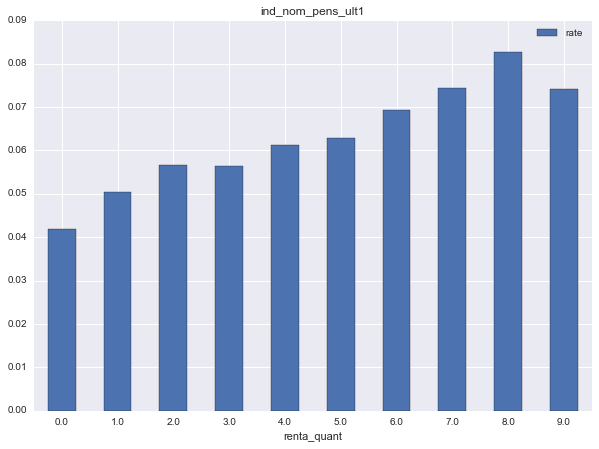

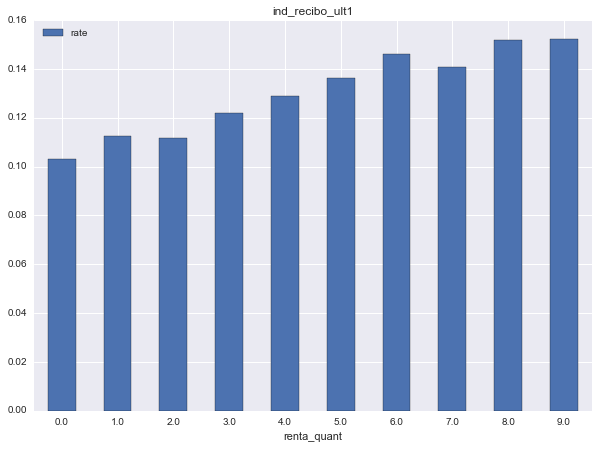

In [371]:
byRenta = df.groupby('renta_quant').apply(calcRates).reset_index()
byRenta = meltRates(byRenta, 'renta_quant')
plotRates(byRenta, 'renta_quant')

## segmento

Fill na's with particulares?

Top customers are more likely to have most products. University students are less likely. And particulares are in the middle.

['02 - PARTICULARES' '03 - UNIVERSITARIO' '01 - TOP' nan]


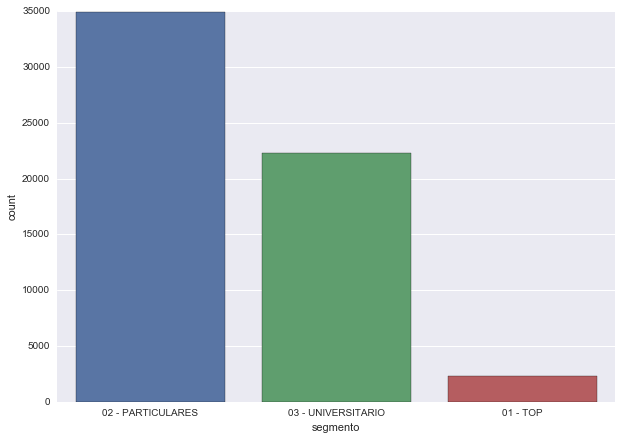

In [374]:
uniqueAndCounts('segmento')

In [375]:
df.segmento.isnull().sum()

426

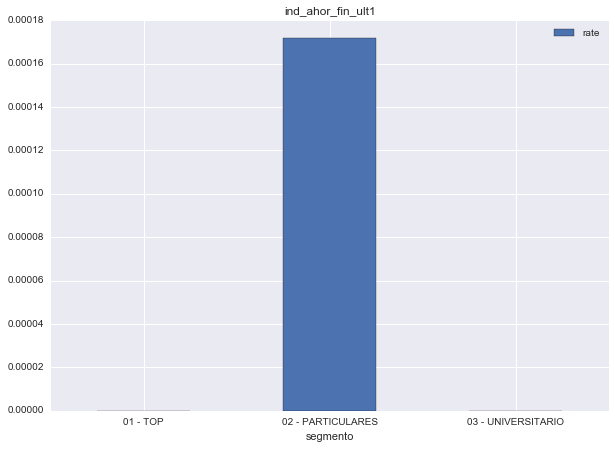

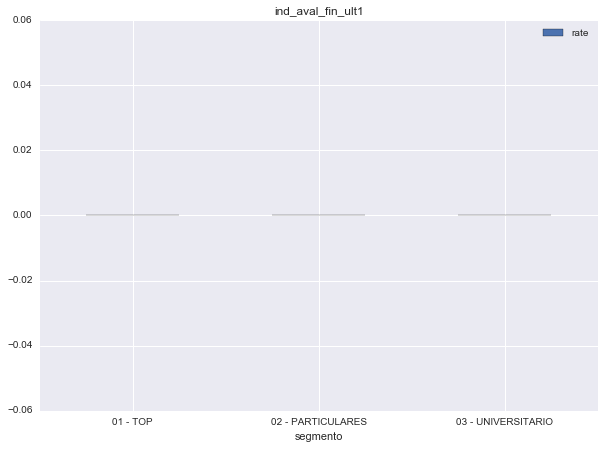

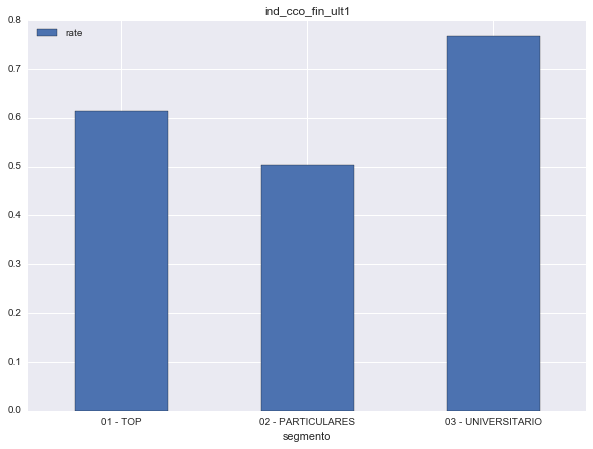

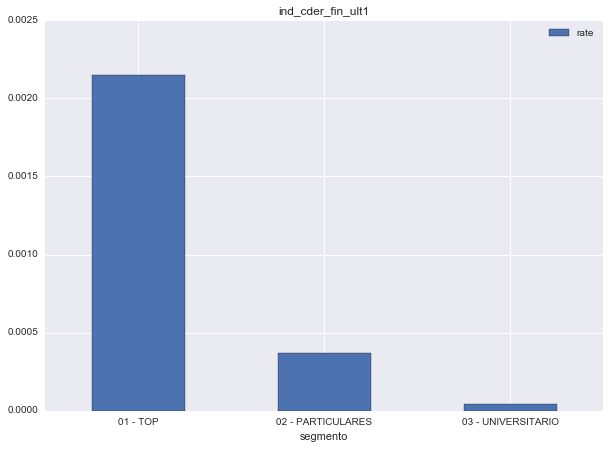

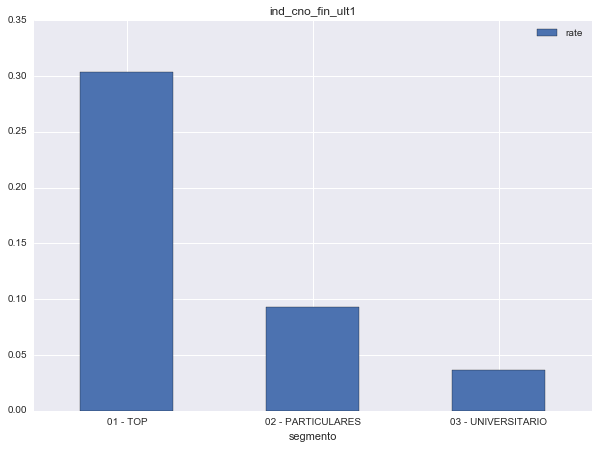

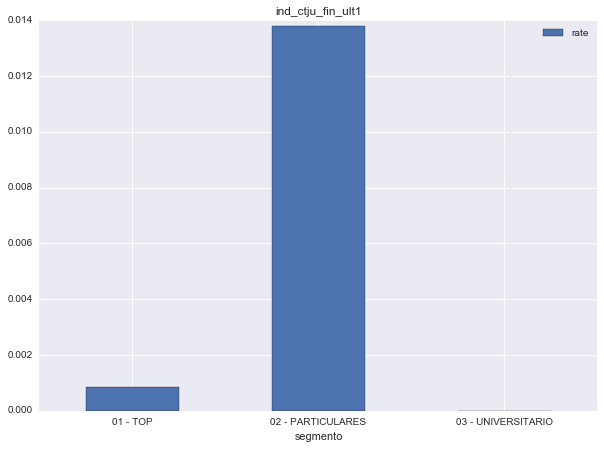

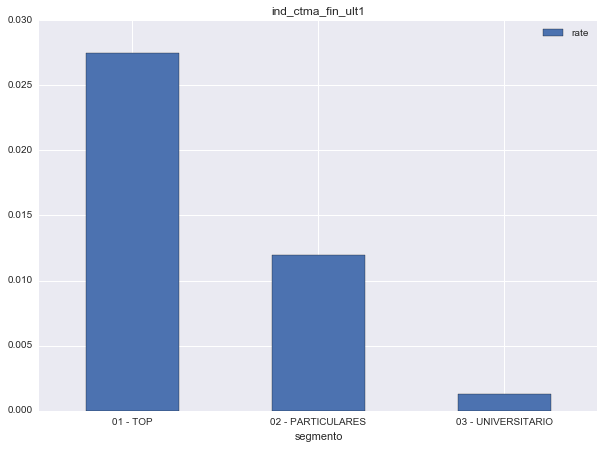

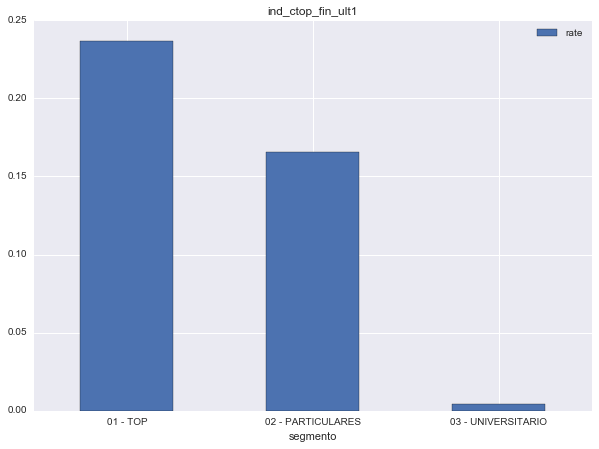

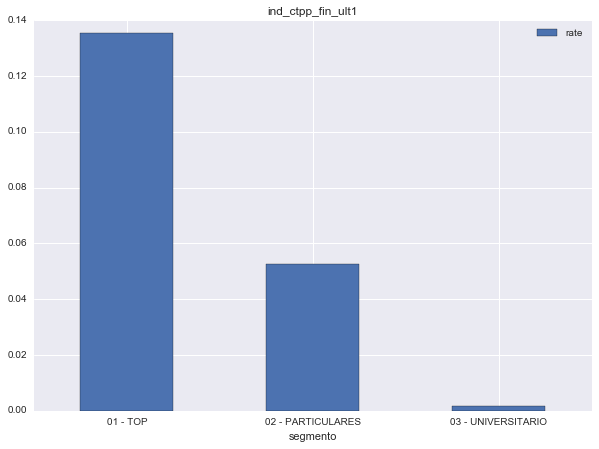

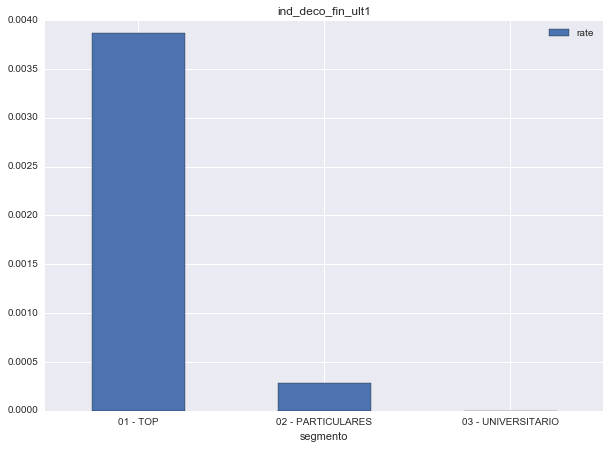

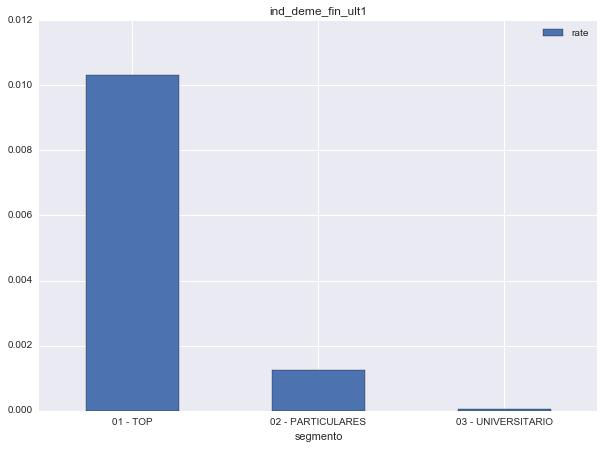

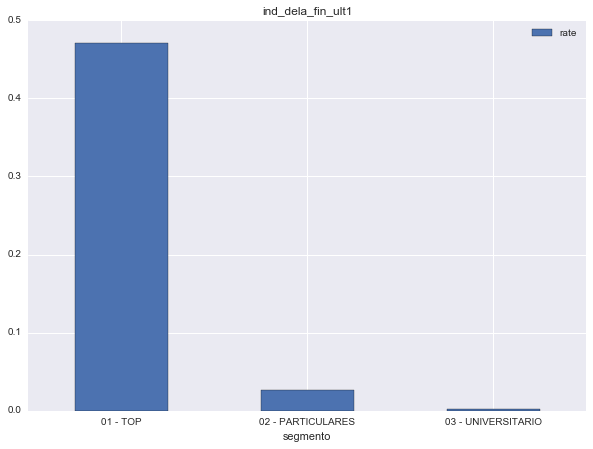

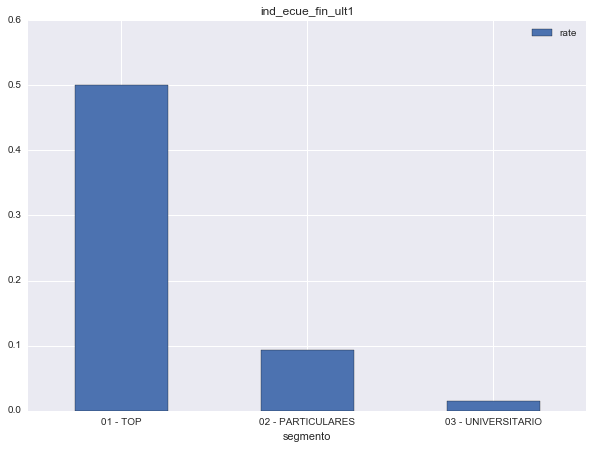

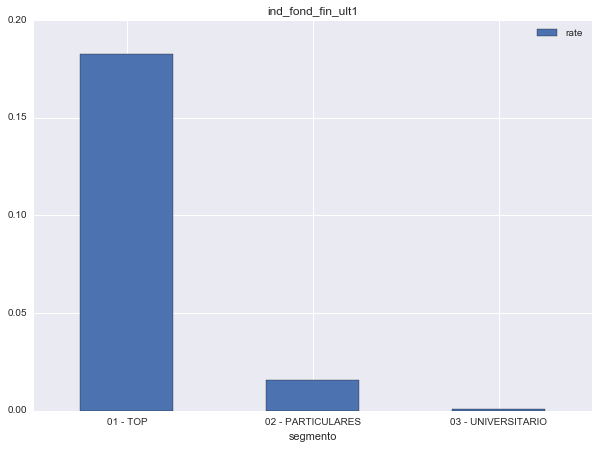

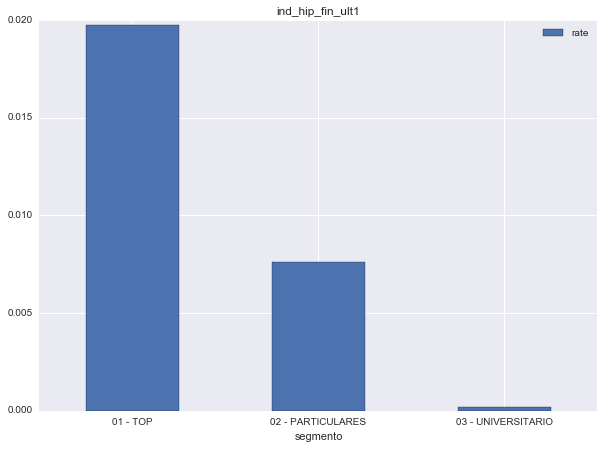

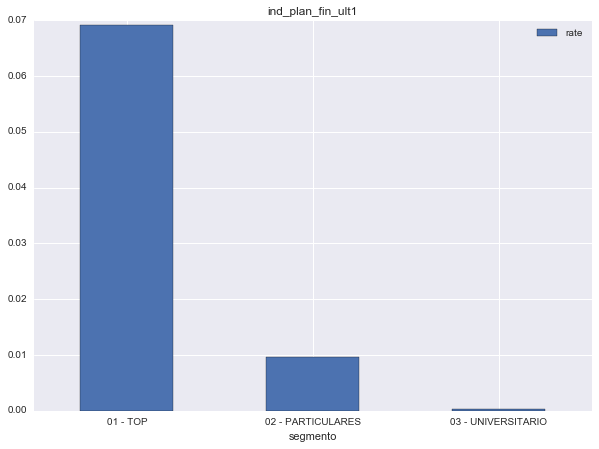

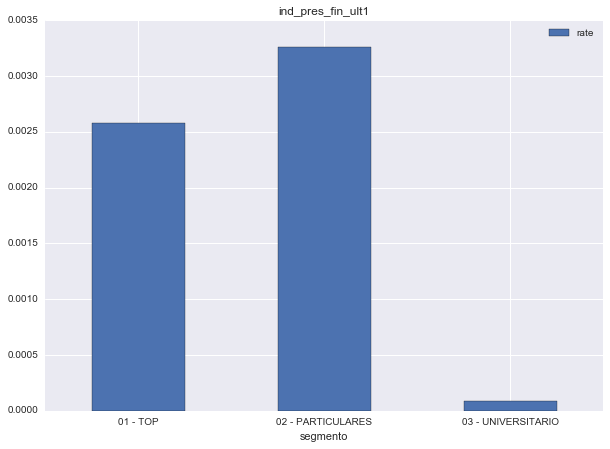

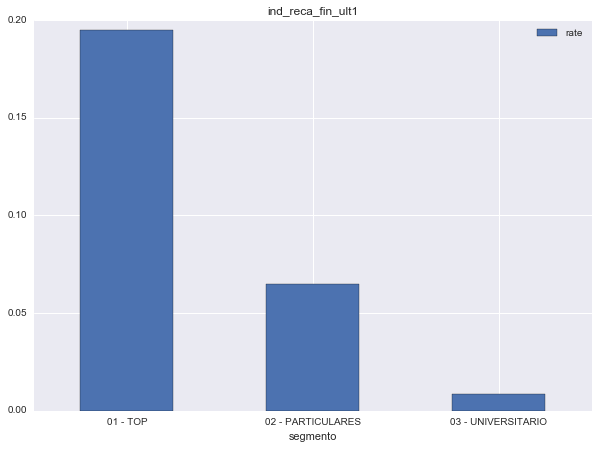

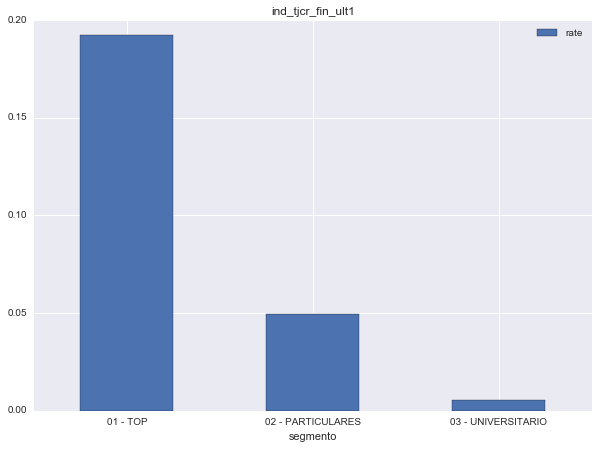

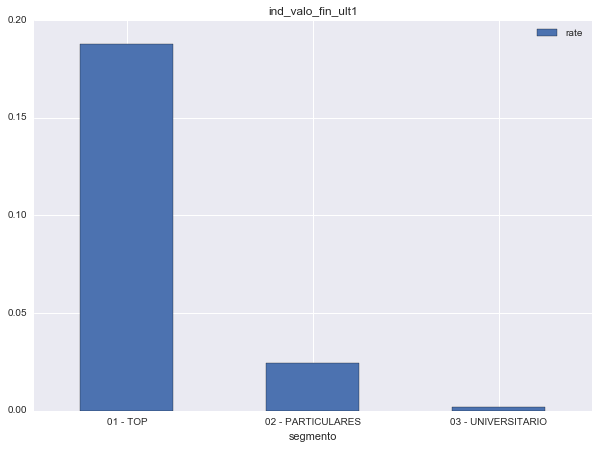

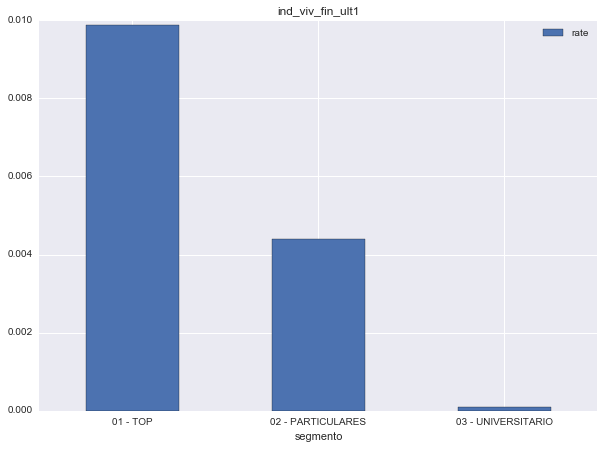

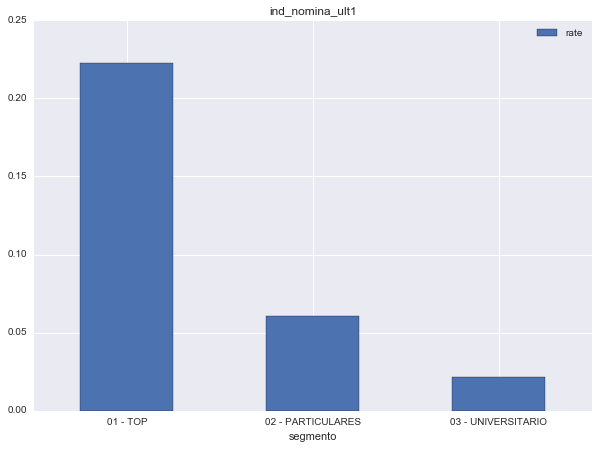

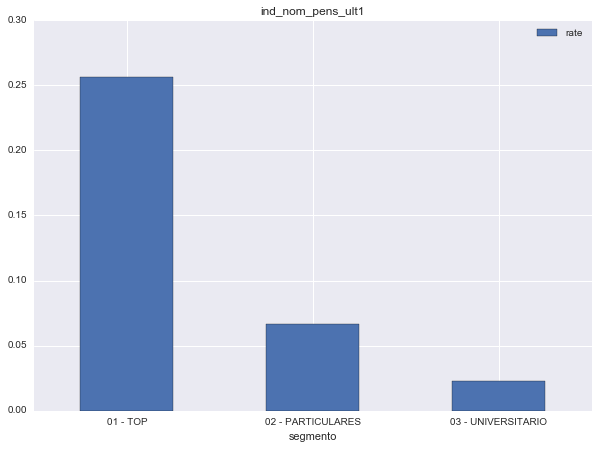

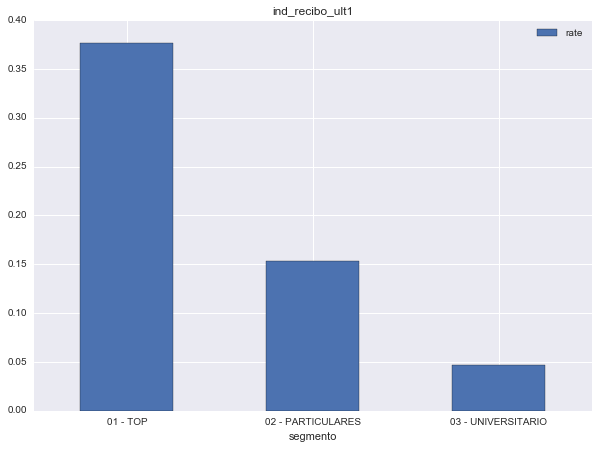

In [377]:
bySegmento = df.groupby('segmento').apply(calcRates).reset_index()
bySegmento = meltRates(bySegmento, 'segmento')
plotRates(bySegmento, 'segmento')

## Products

In [378]:
prodCorr = df[product_cols].corr()

Highest correlations:
- payroll and pension account(might make intuitive sense if these account are used by employers for their employees?)
- payroll account and pension account. payroll and payroll account


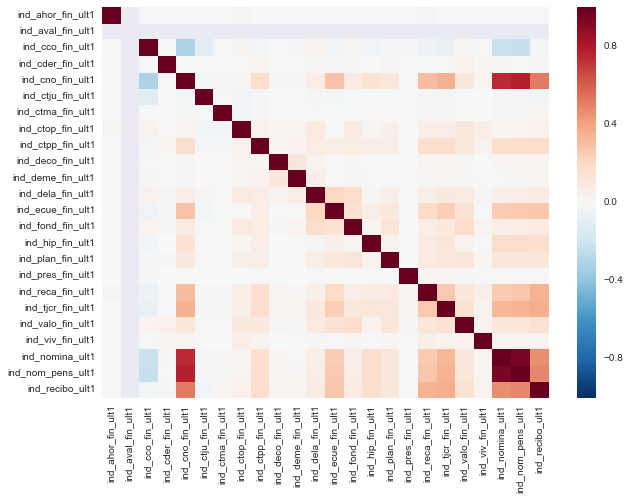

In [379]:
sns.heatmap(prodCorr)